In [213]:
#####################################################################################################################
#### Note: This will be a very extensive project with a lot EDA, Z-score,p-value,various machine learning models ####
#### tuning with gridsearch, PCA, custom Amelia(R)in python using heatmap and a whole lot more ######################
#### I have made it section by section for easy understanding #######################################################
#####################################################################################################################

In [214]:
#####################################################
################ Titanic Data set
################ Part I - Missing Data
#####################################################


import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
## importing

titanic_df = pd.read_csv('train.csv')

<AxesSubplot:>

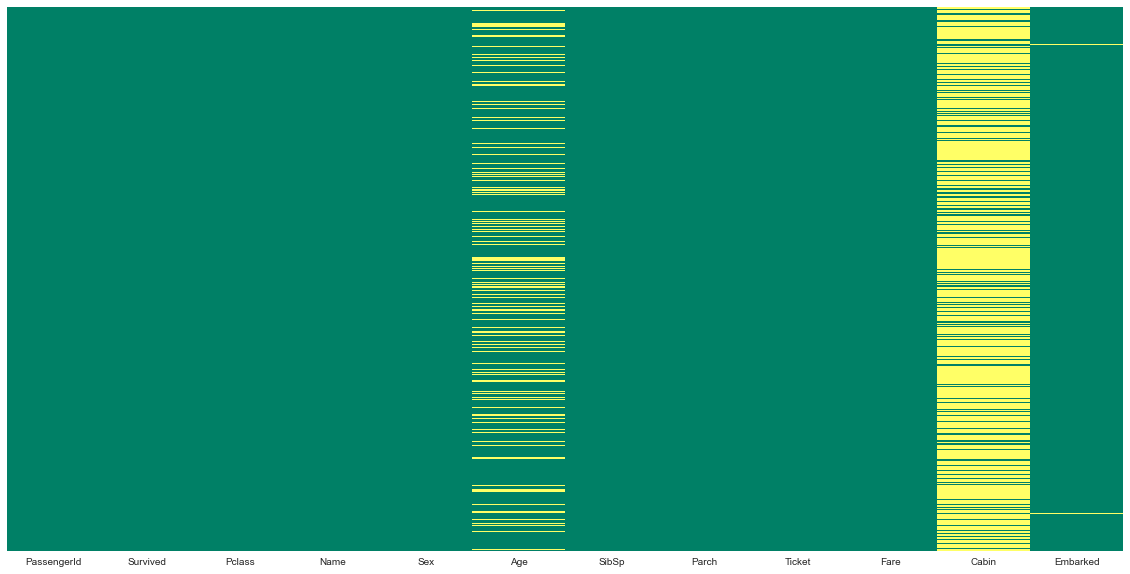

In [216]:
#### just a fancy my way to see which has null values
#### if you coming from R then its almost same like using Amelia for missing data, I loved Amelia in R so had to find a way to make it here

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

In [217]:
titanic_df[titanic_df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [218]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [220]:
#### we see two values empty in Embarked and the most rational way to fill it up is see how much fare they paid
#### then compare to mean of people boarding from different places and then decide which one they most fit in

In [221]:
titanic_df.Fare.mean()

32.2042079685746

In [222]:
titanic_df[titanic_df.Embarked == 'C']['Fare'].mean()       #### mean fare of people who Embarked from Cherbourg

59.95414404761905

In [223]:
titanic_df[titanic_df.Embarked == 'Q']['Fare'].mean()       #### people who boarded from Queenstown mean fare

13.276029870129872

In [224]:
titanic_df[titanic_df.Embarked == 'S']['Fare'].mean()       #### mean fare of Southhampton people

27.07981180124218

In [225]:
titanic_df.Embarked = titanic_df.Embarked.fillna('C')       #### we will fill the Nan value of Embarked column with C because they paid 80 pounds each and the mean of C matches it the most

<AxesSubplot:>

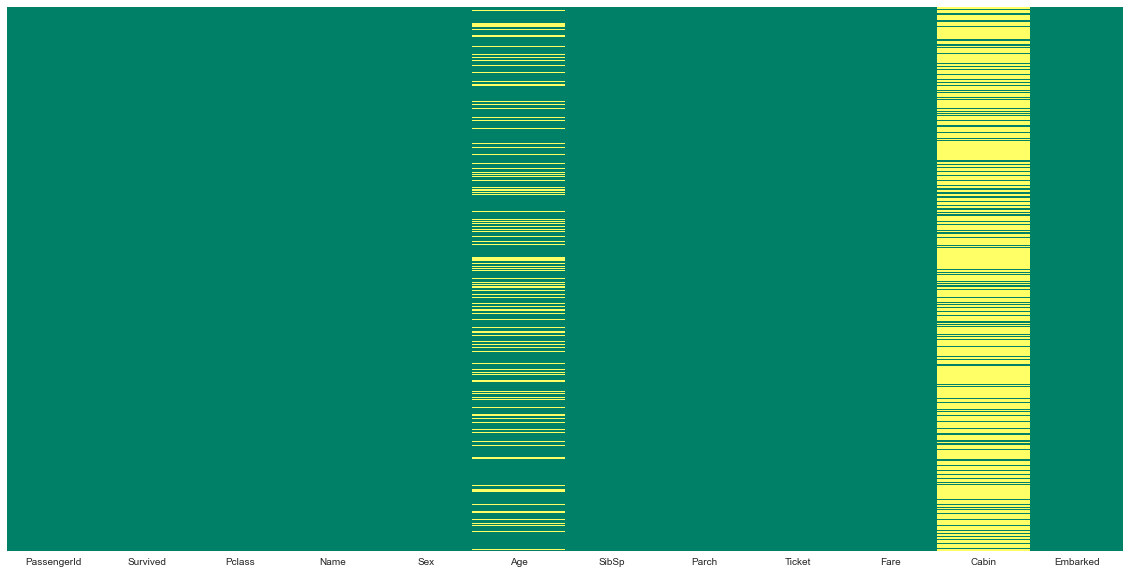

In [226]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

In [227]:
titanic_df[titanic_df.Embarked.isna()]         #### filled the null values from Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [228]:
titanic_df[titanic_df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [229]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())     #### filling up the Age Nan values with the mean

<AxesSubplot:>

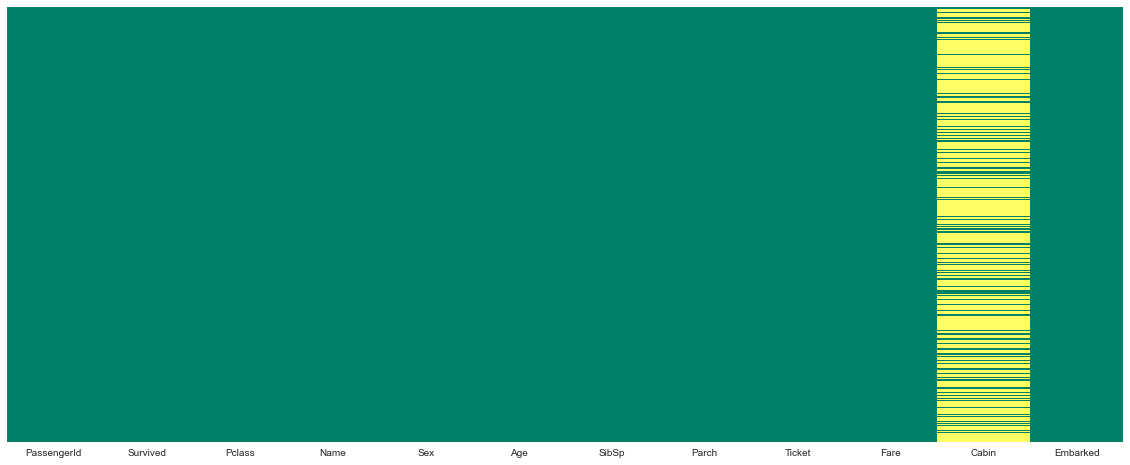

In [230]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

In [231]:
titanic_df[titanic_df.Age.isna()]     #### Age is filled

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [232]:
titanic_df.Cabin.isnull().sum()       #### the problem with cabin is it has a lot of null values and it doesn't have a strong correlation because there's more then 600 null values
                                      #### so the most rational part will be to drop this column

687

In [233]:
#### now we gonna take and tackle the cabin column and know which has the highest people and in which cabin they are
#### we will drop the null values for simplicity

deck = titanic_df.Cabin.dropna()

In [234]:
deck.nunique()

147

In [235]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [236]:
#### now we are not interested in the number after the aplhabet so we will get rid of it

levels = []

for i in deck:
    levels.append(i[0])

cabin_df = pd.DataFrame(levels)

cabin_df.head()

,0
0,C
1,C
2,E
3,G
4,C


In [237]:
#### lets just quickly rename the column name here to Cabin

cabin_df.columns = ['Cabin']

cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


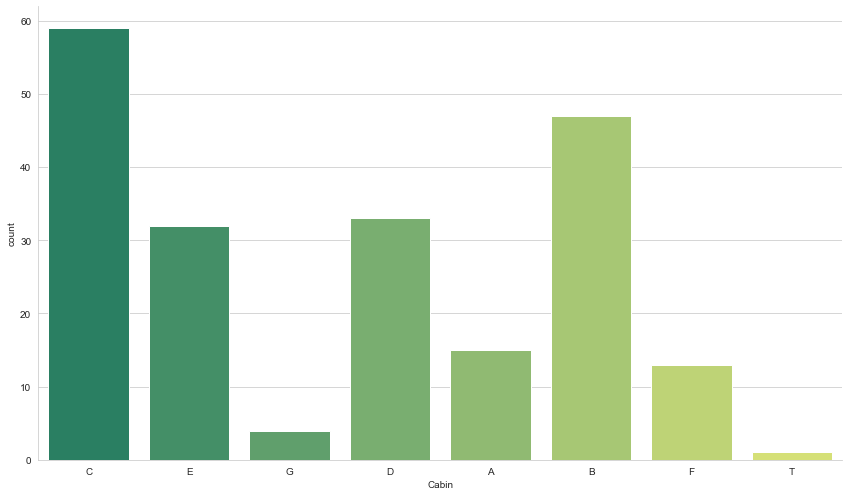

In [238]:
#### the most were in cabin C and B

sns.catplot(x='Cabin',data=cabin_df,kind='count',palette='summer',height=7,aspect=1.7)

In [240]:
cabin_df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [241]:
titanic_df.drop(columns='Cabin',inplace=True)

In [242]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,S


<AxesSubplot:>

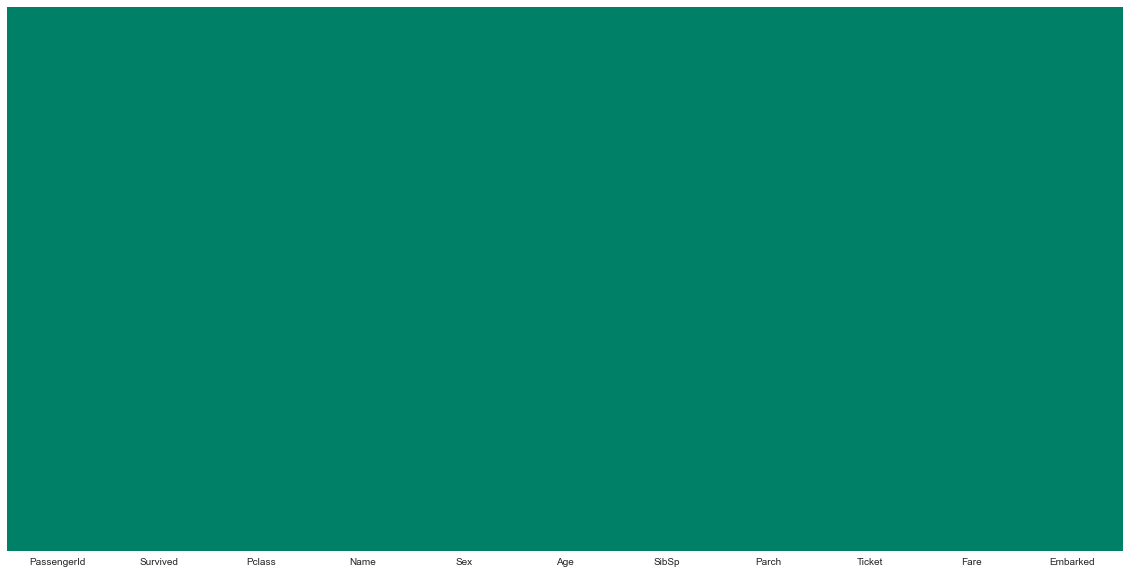

In [244]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

In [245]:
#### now we have a very clean data and no column is empty

In [248]:
titanic_df[titanic_df.isnull()].sum()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name             0
Sex              0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket           0
Fare           0.0
Embarked         0
dtype: object

In [ ]:
#####################################################
################ Titanic Data set
################ Part II - EDA
#####################################################


Text(0, 0.5, 'Fares')

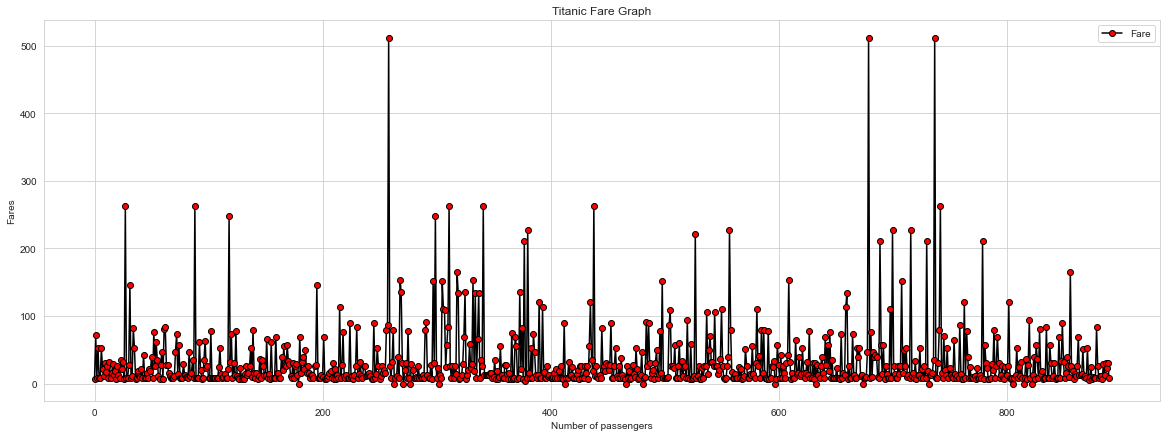

In [252]:
titanic_df.Fare.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Titanic Fare Graph')

plt.xlabel('Number of passengers')

plt.ylabel('Fares')

In [253]:
#### we have some outliers and most of the peoples fare lie beliw 100

Text(0, 0.5, 'Ages')

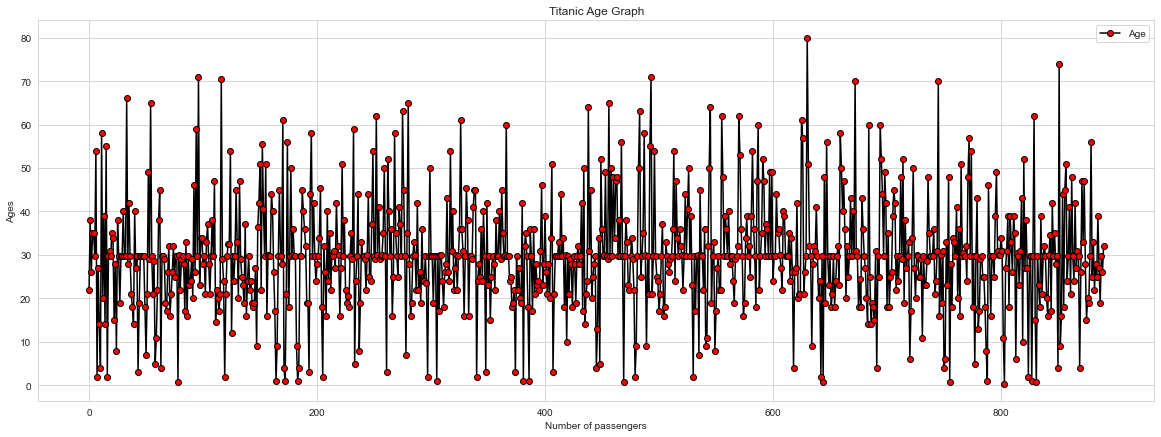

In [254]:
titanic_df.Age.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Titanic Age Graph')

plt.xlabel('Number of passengers')

plt.ylabel('Ages')                        #### from the graph it seems the mean should be around 30 Age

In [256]:
titanic_df.Age.mean()             #### yes its true, the mean is almsot 30 for Age

29.699117647058763

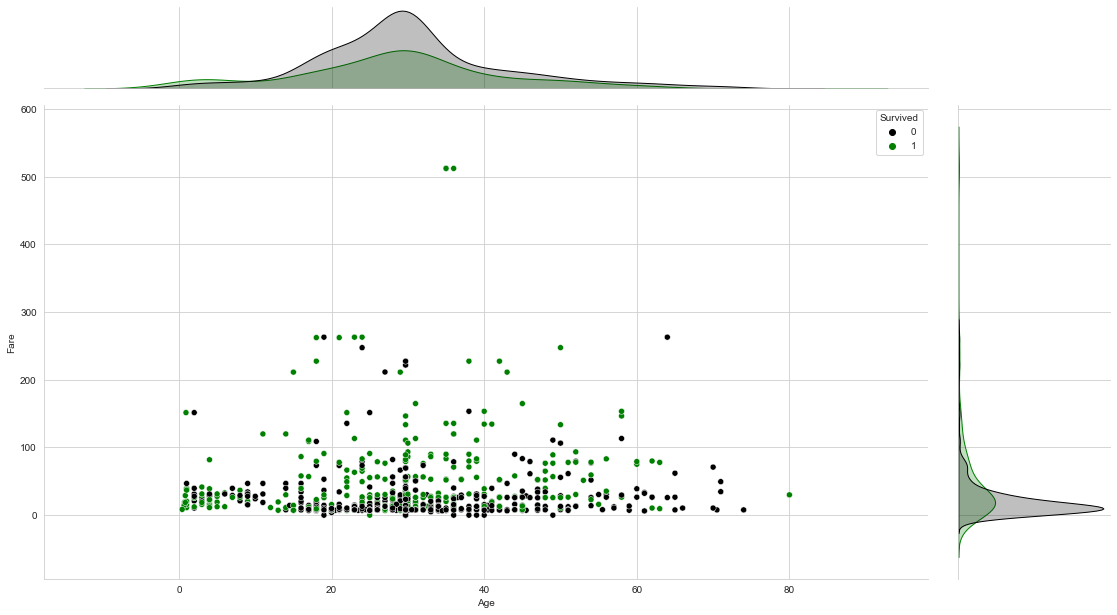

In [258]:
custom = {0:'black',
         1:'green'}

g = sns.jointplot(x=titanic_df.Age,y=titanic_df.Fare,data=titanic_df,hue='Survived',palette=custom)

g.fig.set_size_inches(17,9)

#### seems like two people paid more then 500 but they did survive
#### we see a huge standard deviation in 0 between 20-40 Ages
#### we see a big surge in standard deviation for 0 in fares between 0 - 30

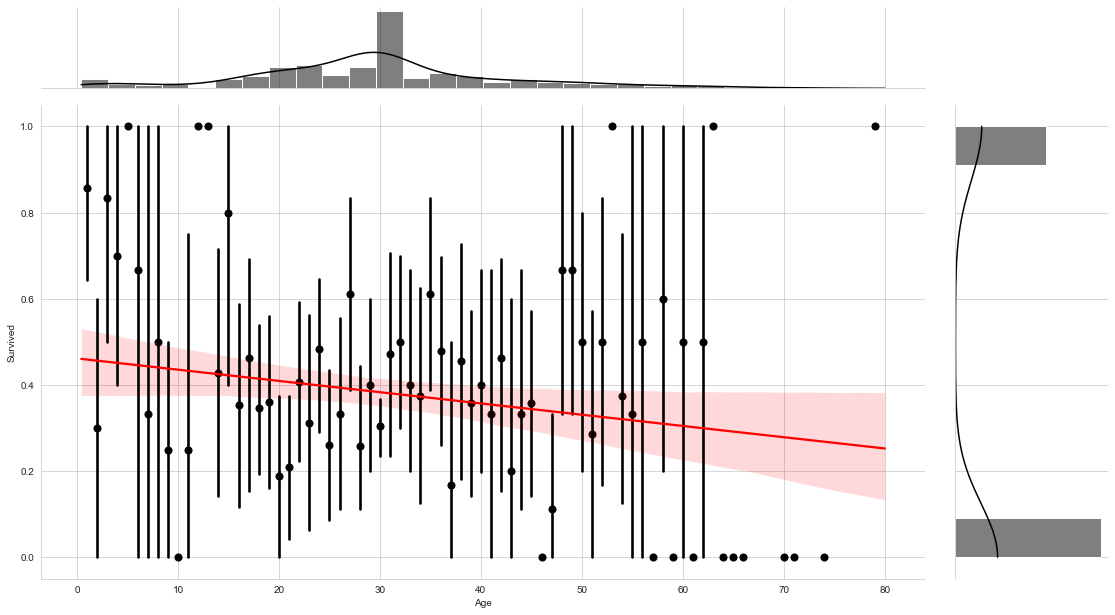

In [282]:
g = sns.jointplot(x='Age',y='Survived',data=titanic_df,kind='reg',x_bins=[range(1,80)],color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

#### as the age goes up the survival rate goes down, which is not suprising. also the regression points to that

In [264]:
#### lets quickly see if we are right with pearsonr

from scipy.stats import pearsonr

In [265]:
co_eff, p_value = pearsonr(titanic_df.Survived,titanic_df.Fare)

In [266]:
co_eff

0.25730652238496243

In [267]:
p_value         #### p-value is less then 0.05 significance level which means we can reject the null hypothesis and accept alternative hypothesis, in short they are correlated and not by chance

6.120189341917992e-15

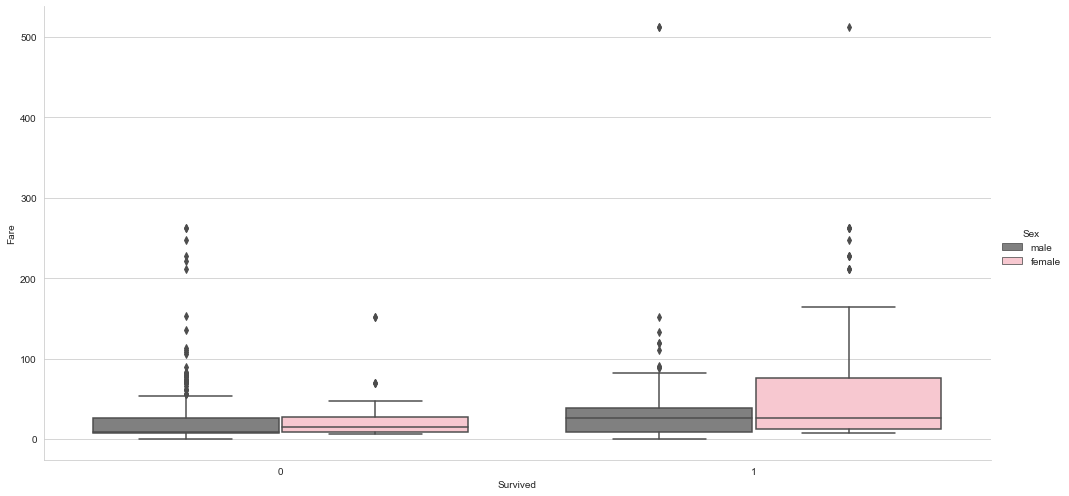

In [283]:
#### quite interesting we see apart from the outliers, people who paid a bit more fare relatively survived in grand scheme
#### the little dots or whiskers that we see are the outliers
#### also females survived more then males

custom = {'male':'grey',
          'female':'pink'}

sns.catplot(x='Survived',y='Fare',data=titanic_df,kind='box',height=7,aspect=2,palette=custom,legend=True,hue='Sex')

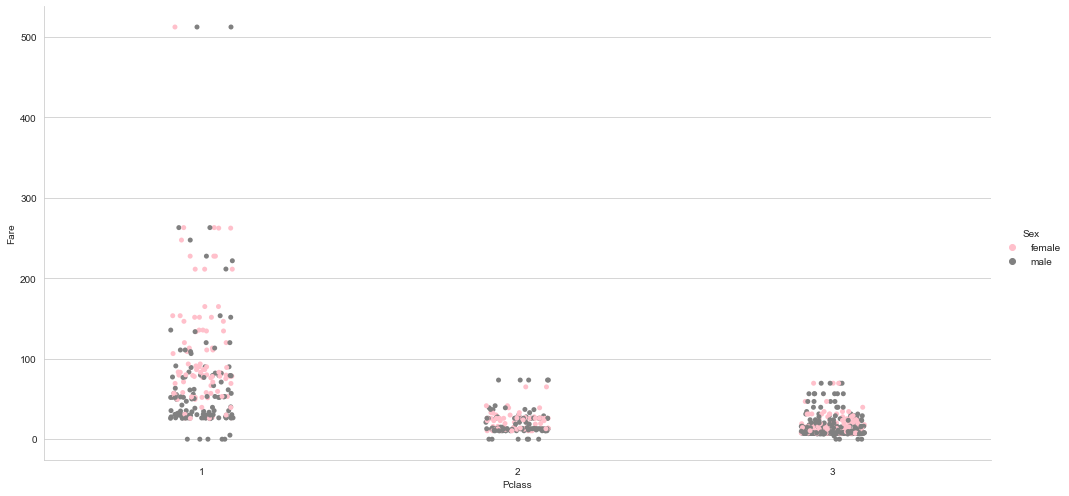

In [284]:
#### first class is dominated by females and Pclass 3 is male dominated class from the plot it seems

sns.catplot(x='Pclass',y='Fare',data=titanic_df,kind='strip',height=7,aspect=2,palette=custom,legend=True,hue='Sex',jitter=True)

In [285]:
#### model build without much EDA

corr = titanic_df.corr()

In [287]:
corr.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651


<AxesSubplot:>

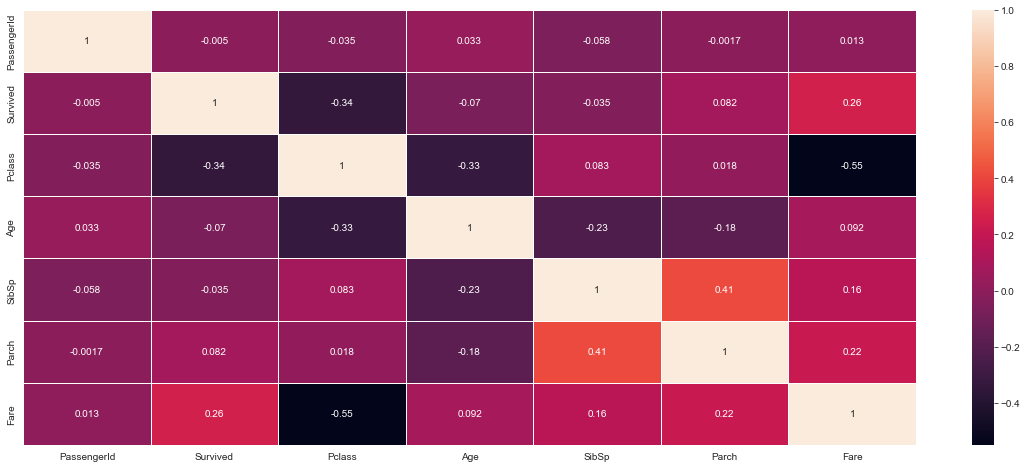

In [289]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True)

#### note this is very basic correlation heatmeat because we didn't do much with transformation but just to see an idea how are things related
#### from this very very basic untransformed heatmap correlation diagram, we see Fare is more correlated to Survival
#### we will do a more complex and proper correlation and heatmap further down

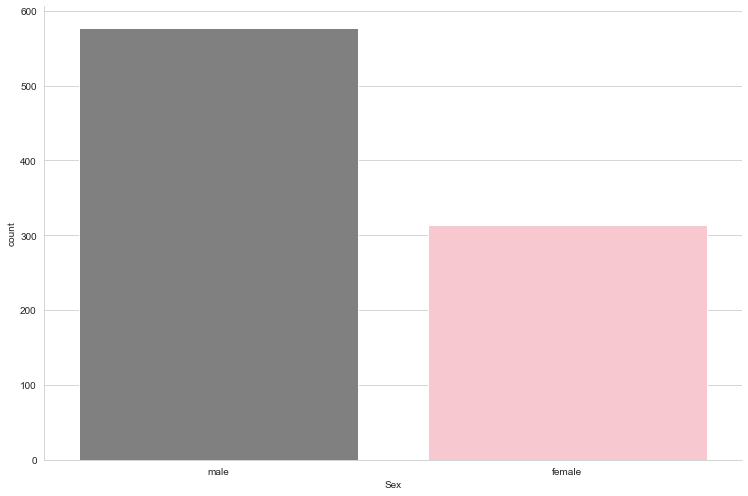

In [296]:
#### Now lets take a look at who were the passengers in Titanic, more males then females

custom = {'male':'grey',
          'female':'pink'}

sns.catplot(x='Sex',data=titanic_df,kind='count',height=7,aspect=1.5,palette=custom)

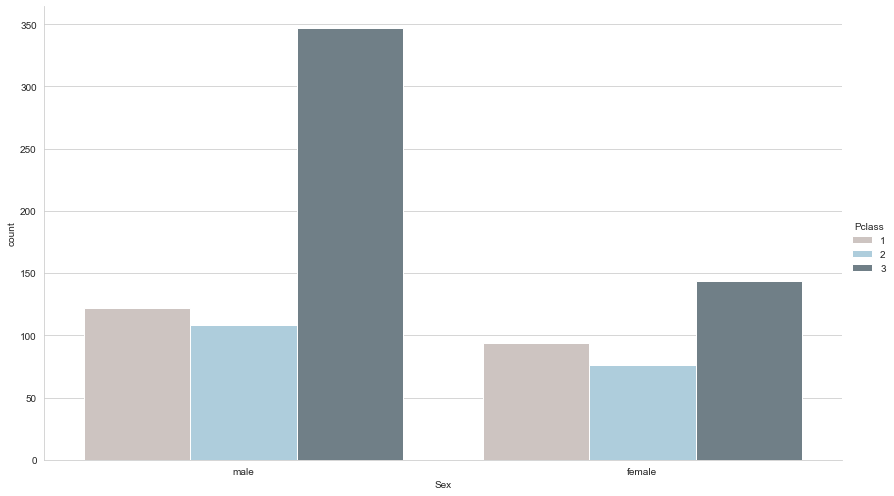

In [293]:
#### now lets see with some hue being the pclass
#### majority of pclass3 were males

sns.catplot(x='Sex',data= titanic_df,hue='Pclass',kind='count',palette='RdBu_d',height=7,aspect=1.7)

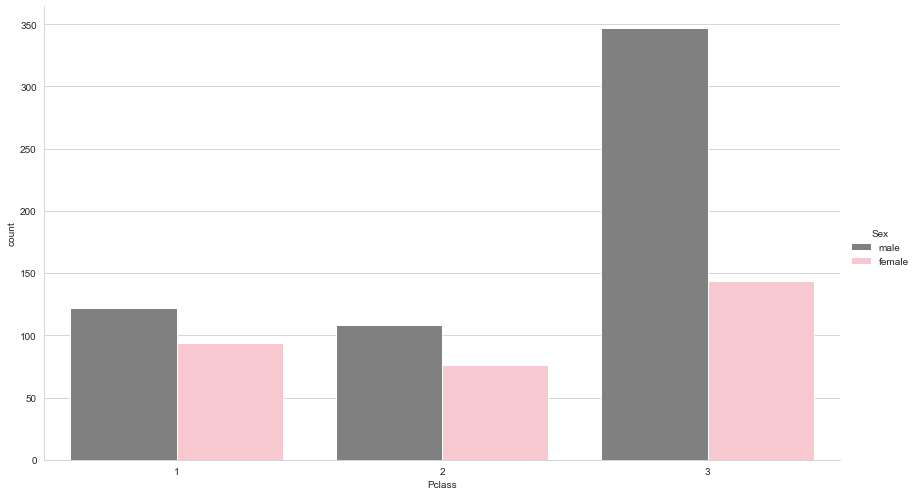

In [297]:
#### we see that the number of passengers either it be male or female, they were greater in numbers with Pclass being the lower tier
#### meaning we had more working class or poor if you will boarding the ship then the upper class people
#### also we see that number of female to male ratio was favoring male

custom = {'male':'grey',
          'female':'pink'}

sns.catplot(x='Pclass',data= titanic_df,hue='Sex',kind='count',palette=custom,height=7,aspect=1.7)

In [298]:
#### this is really revealing information because it seems the first and second class passengers were almost evenly split between the genders
#### but the third class passengers were dominated by male population, INTERESTING

#### now we will make another column which will divide the gender into male, female and child

def gender_col(passenger):
    age,sex = passenger
    
    if age < 18:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(gender_col,axis=1)

In [301]:
titanic_df.head(10).style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,S,male
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.458300,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,C,child


In [305]:
titanic_df.person.value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

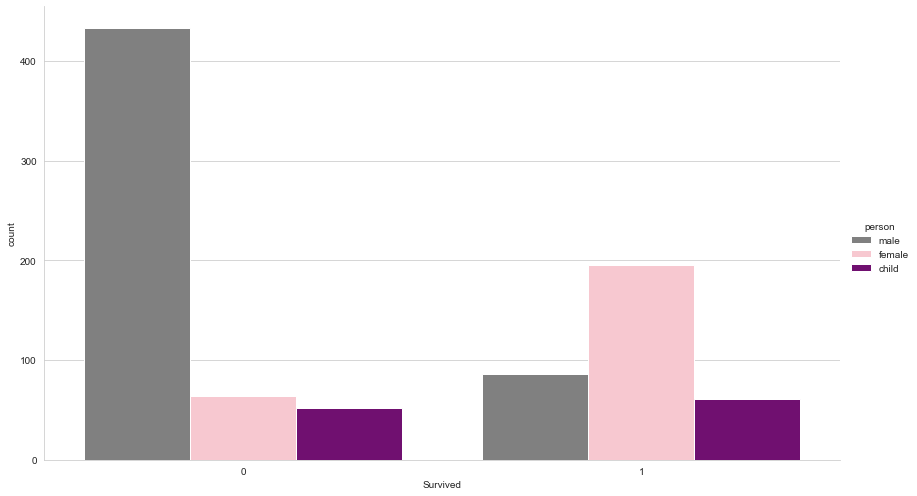

In [307]:
custom = {'male':'grey',
          'female':'pink',
          'child':'purple'}

sns.catplot(x='Survived',data= titanic_df,hue='person',kind='count',palette=custom,height=7,aspect=1.7)

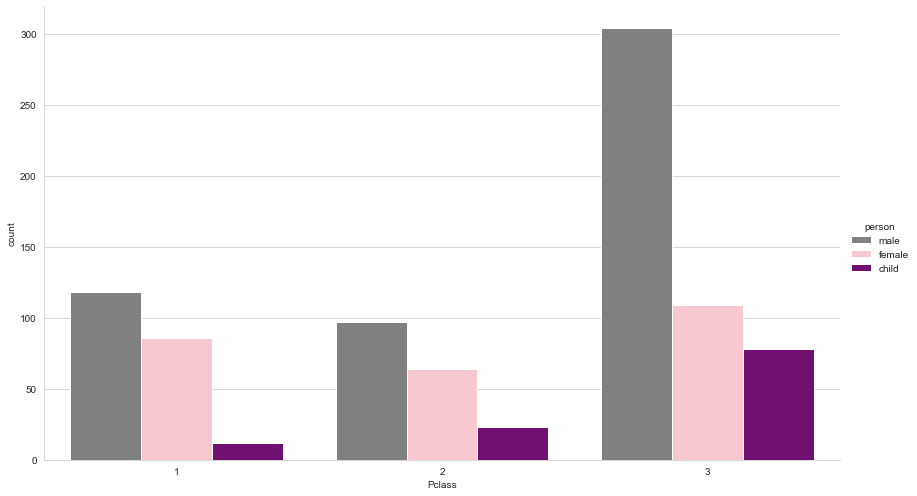

In [309]:
#### This is quite revealing as we see the number of survival rates were favoring female then male, INTERESTING

custom = {'male':'grey',
          'female':'pink',
          'child':'purple'}

sns.catplot(x='Pclass',data= titanic_df,hue='person',kind='count',palette=custom,height=7,aspect=1.7)

<AxesSubplot:ylabel='Frequency'>

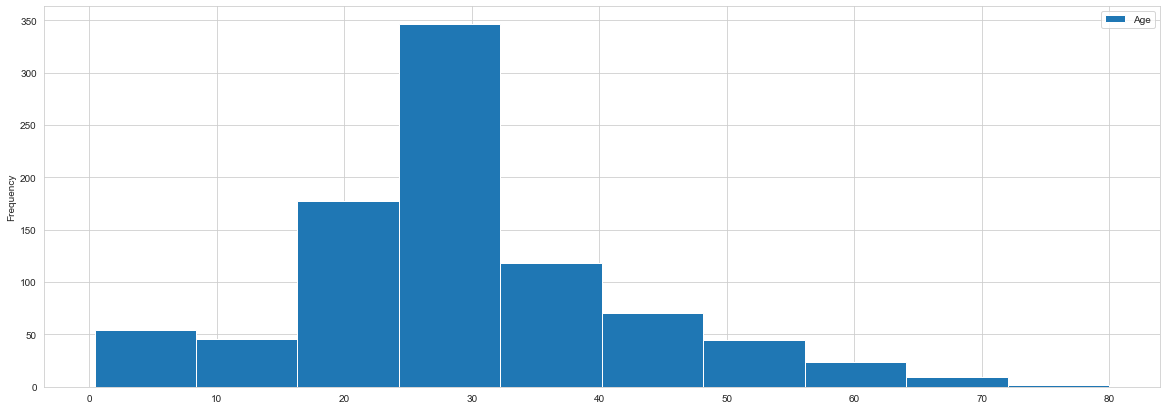

In [310]:
#### seems like people who boarded the ship in Pclass 3 were mostly men
#### now lets see the histogram of the age column

titanic_df['Age'].plot(kind='hist',legend=True,figsize=(20,7))

In [311]:
##################################################
#################### Age
##################################################

titanic_df.head()          #### note for some reason, when i apply style background the column Fare shows up with multiple 0s after decimal
                           #### but in reality I have formatted in a way to show only 2 digits after decimal, like we see below
                           #### style background treats any column with float type as such, but I don't wanna convert into int type and lose flexibility
                           #### if anybody knows how to do show them exactly like below with style background please let me know

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


In [312]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,S,male


In [313]:
titanic_df.Age.max()

80.0

In [315]:
titanic_df.Age.min()             #### we will convert this to 1 so anything below 0-1 becomes 1

0.42

In [316]:
titanic_df.Age = titanic_df.Age.apply(lambda x: 1 if x < 1 else x)

In [318]:
titanic_df.Age.min()

1.0

In [319]:
mean_df = titanic_df.Age.mean()
std_df = titanic_df.Age.std()

print(mean_df,std_df)

29.701171519112638 12.997448276572772


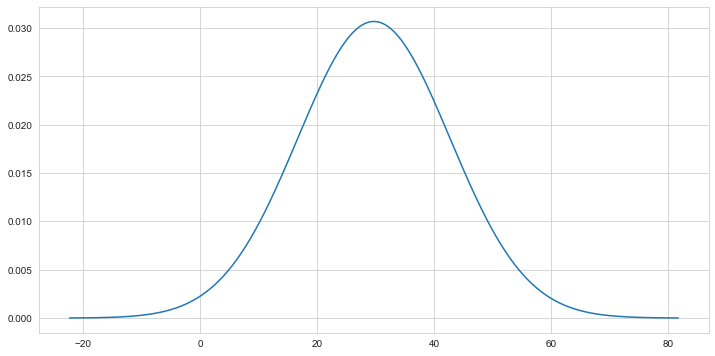

In [320]:
#### now we will make a very nice comprehensive standard deviation graph for Age column
from scipy.stats import norm


x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(12, 6))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### this is very basic one but as we feeling fancy today so we will do a very comprehensive one

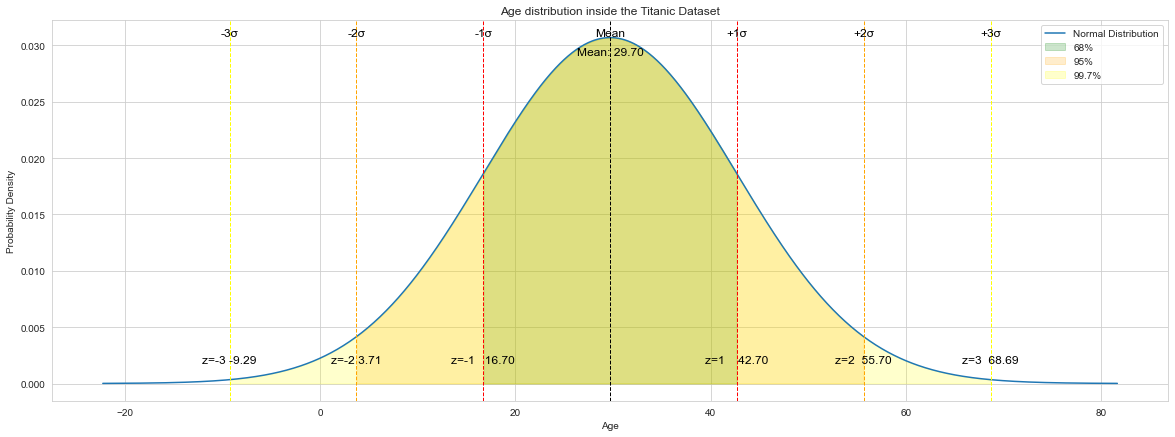

In [321]:
#### Comprehensive time

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='orange', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='yellow', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Age distribution inside the Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Probability Density')

plt.legend()

In [322]:
#### so from the above plot we can clearly see the mean and standard deviation and its respective z score
#### about the z score anything that falls above or below 3 is considered as an outlier according to the statistics and its true even here as we see
#### as we talking about statistics, lets dive into the confidence interval
#### lets say we wanna find out, the age of people who boarded the ship with a confidence interval of 95%

standard_error = std_df/np.sqrt(titanic_df.shape[0])

In [323]:
#### 95% confidence interval people who boarded the titanic were between these ages

from scipy import stats

stats.norm.interval(alpha=0.95,loc=mean_df,scale=standard_error)

(28.847742636061156, 30.55460040216412)

In [324]:
#### we wanna go one step further and see the confidence interval of 99%
#### 99% confidence interval people who boarded the titanic were between these ages

stats.norm.interval(alpha=0.99,loc=mean_df,scale=standard_error)

(28.57957584551923, 30.822767192706046)

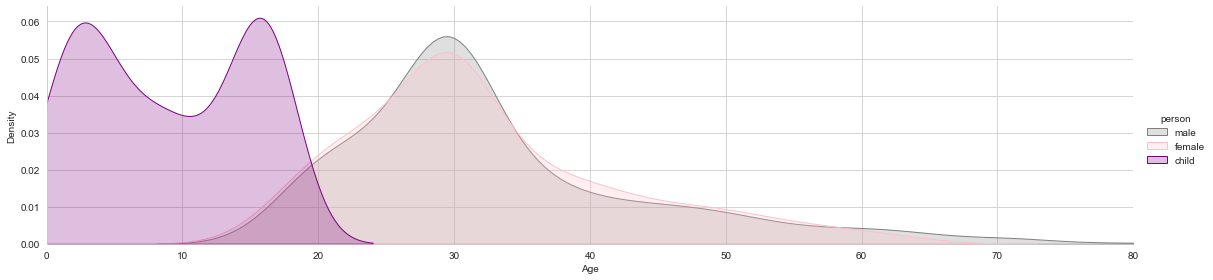

In [330]:
#### next we will make a facetgrid of person and map it with the kde with regards to age and see how it looks

custom = {'male':'grey',
          'female':'pink',
          'child':'purple'}

pl = sns.FacetGrid(titanic_df,hue='person',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Age',fill=True)

pl.set(xlim=(0,titanic_df.Age.max()))

pl.add_legend()

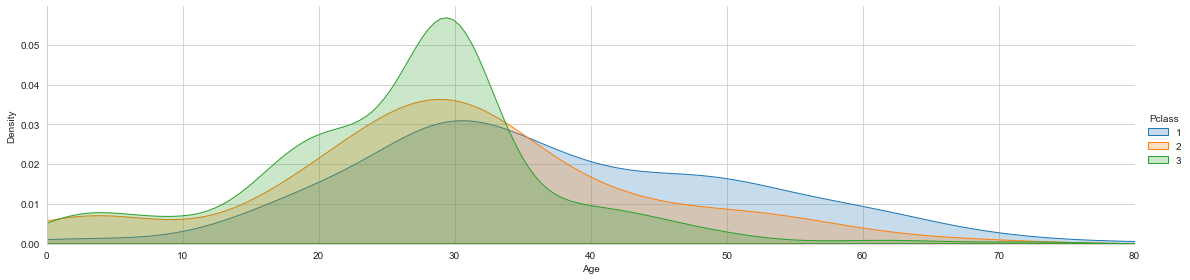

In [327]:
#### now lets see the same plotting but with pclass
#### seems like the majority in pclass 3 were in mid 20s to 30s

pl = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4,height=4)

pl.map(sns.kdeplot,'Age',fill=True)

pl.set(xlim=(0,titanic_df.Age.max()))

pl.add_legend()

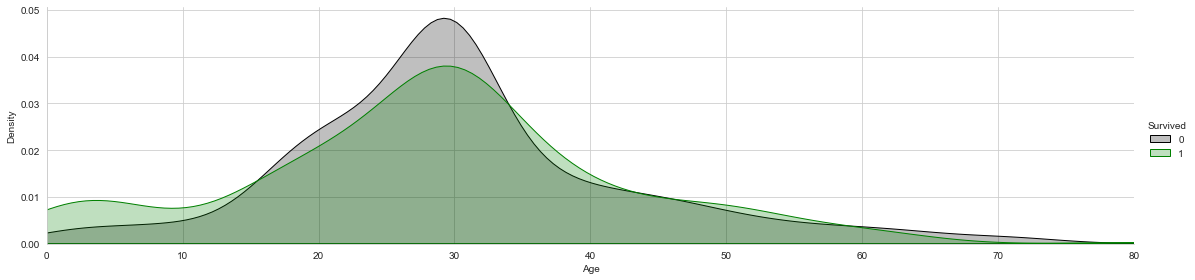

In [331]:
#### now lets see the same plotting but with survived
#### we see that the major lump for people who didn't survive were between 20 to 30

custom = {0:'black',
          1:'green'}

pl = sns.FacetGrid(titanic_df,hue='Survived',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Age',fill=True)

pl.set(xlim=(0,titanic_df.Age.max()))

pl.add_legend()

In [332]:
######################################################
###################### Embarked
######################################################

titanic_df.Embarked.value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [333]:
embarked_mapping = {'S':'Southhampton',
                   'C':'Cherbourg',
                   'Q':'Queenstown'}

titanic_df.Embarked = titanic_df.Embarked.map(embarked_mapping)

In [334]:
titanic_df.Embarked.value_counts()

Southhampton    644
Cherbourg       170
Queenstown       77
Name: Embarked, dtype: int64

In [335]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male


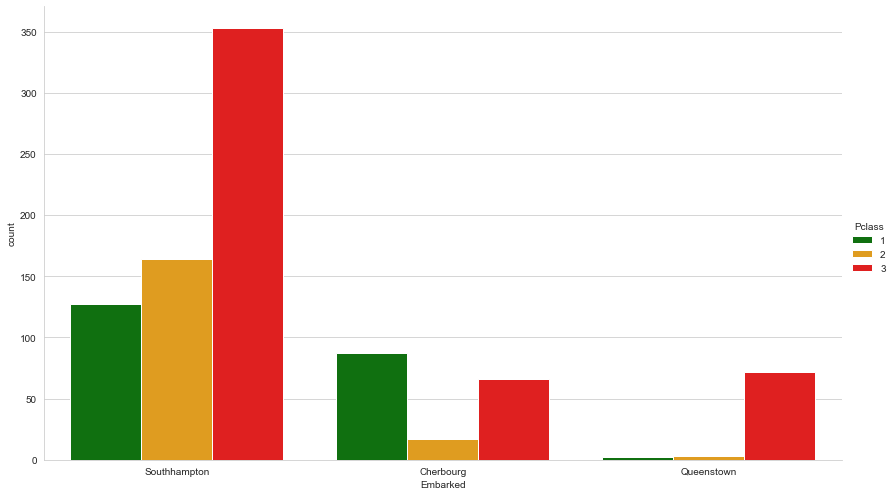

In [338]:
#### now lets make some plots
#### seems like most of the people from Southhampton were in Pclass 3

custom = {1:'green',
          2:'orange',
          3:'red'}

sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',palette=custom,kind='count',height=7,aspect=1.7)

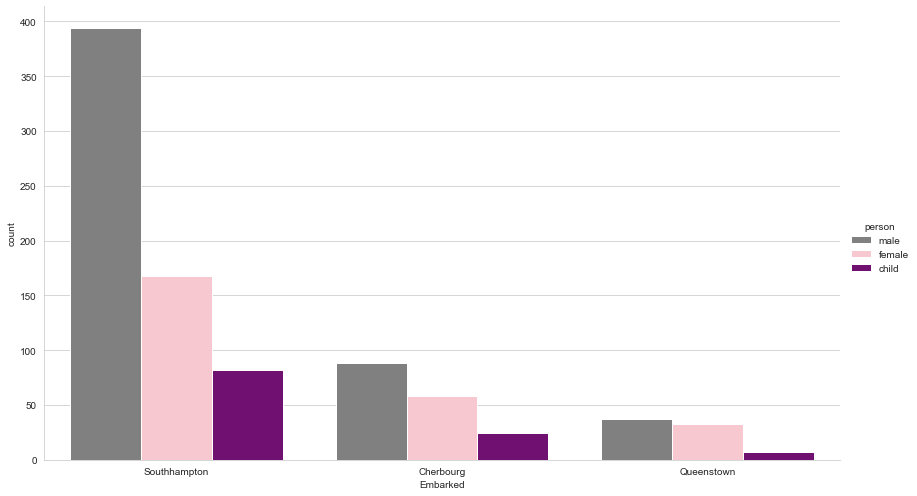

In [340]:
#### male population is more from people of Southhampton who boarded the ship

custom = {'male':'grey',
          'female':'pink',
          'child':'purple'}

sns.catplot(x='Embarked',data=titanic_df,hue='person',palette=custom,kind='count',height=7,aspect=1.7)

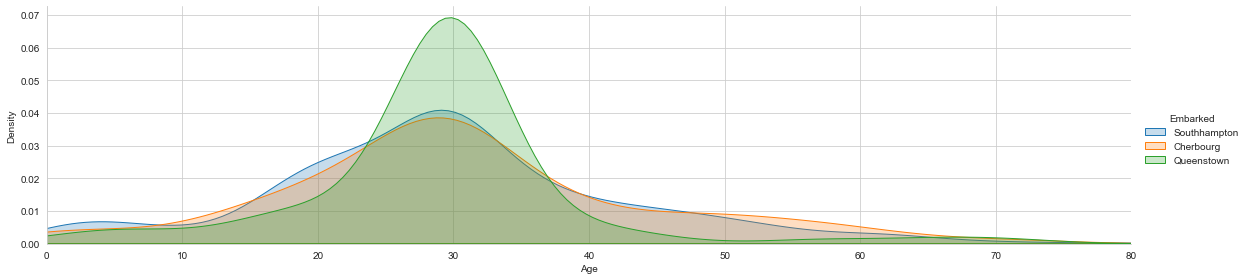

In [341]:
#### from this it seems most of them were from Southhampton, but Queenstown had the majority of third lower tier passengers
#### it seems Queenstown back in the day was not a economically stable city from the data we have

pl = sns.FacetGrid(titanic_df,hue='Embarked',aspect=4,height=4)

pl.map(sns.kdeplot,'Age',fill=True)

pl.set(xlim=(0,titanic_df.Age.max()))

pl.add_legend()

In [342]:
#######################################################
############## Part V - Alone
#######################################################

In [343]:
#### Now we will tackle the problem of who were with parents or siblings and who were alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [345]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male,0


In [346]:
titanic_df.Alone.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [347]:
titanic_df.Alone.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Alone, dtype: int64

In [348]:
titanic_df.Alone = titanic_df.Alone.apply(lambda x: 1 if x > 0 else 0)

In [349]:
titanic_df.Alone.unique()

array([1, 0], dtype=int64)

In [350]:
titanic_df.Alone.value_counts()          #### note 0 means alone and 1 means with family

0    537
1    354
Name: Alone, dtype: int64

In [353]:
titanic_df.rename(columns={'Alone':'Family'},inplace=True)

In [354]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male,0


In [355]:
titanic_df.Family.value_counts()

0    537
1    354
Name: Family, dtype: int64

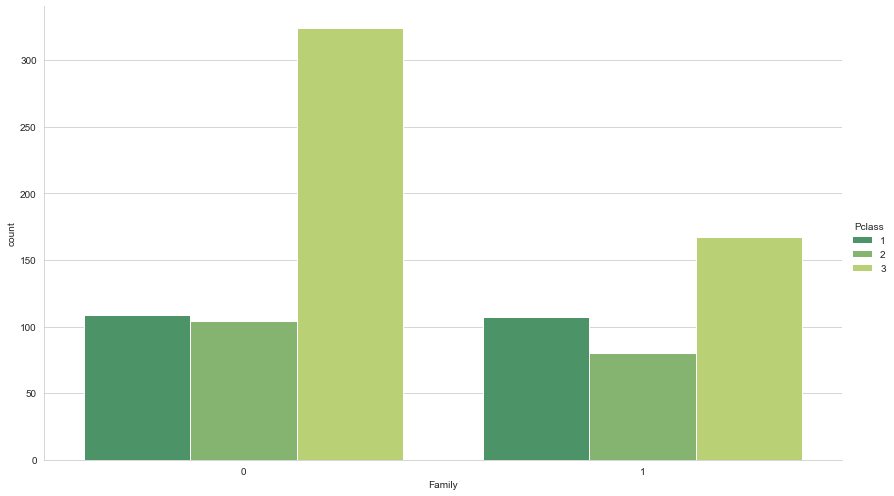

In [356]:
sns.catplot(x='Family',data=titanic_df,kind='count',hue='Pclass',palette='summer',height=7,aspect=1.7)

#### seems like we had a lot of Alone people in pclass 3

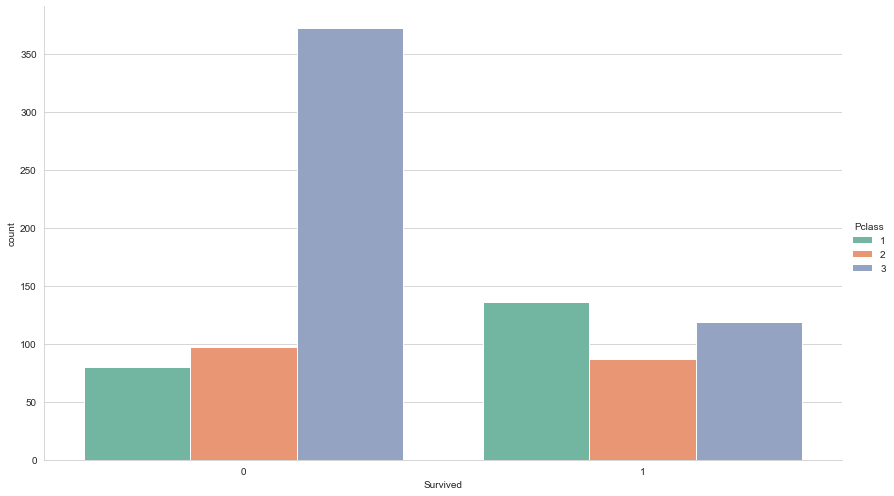

In [358]:
sns.catplot(x='Survived',data=titanic_df,kind='count',hue='Pclass',palette='Set2',height=7,aspect=1.7)

#### pretty obvious that people who were in Pclass3 didn't survive much compared to other classes

([<matplotlib.axis.XTick at 0x2880efdd630>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

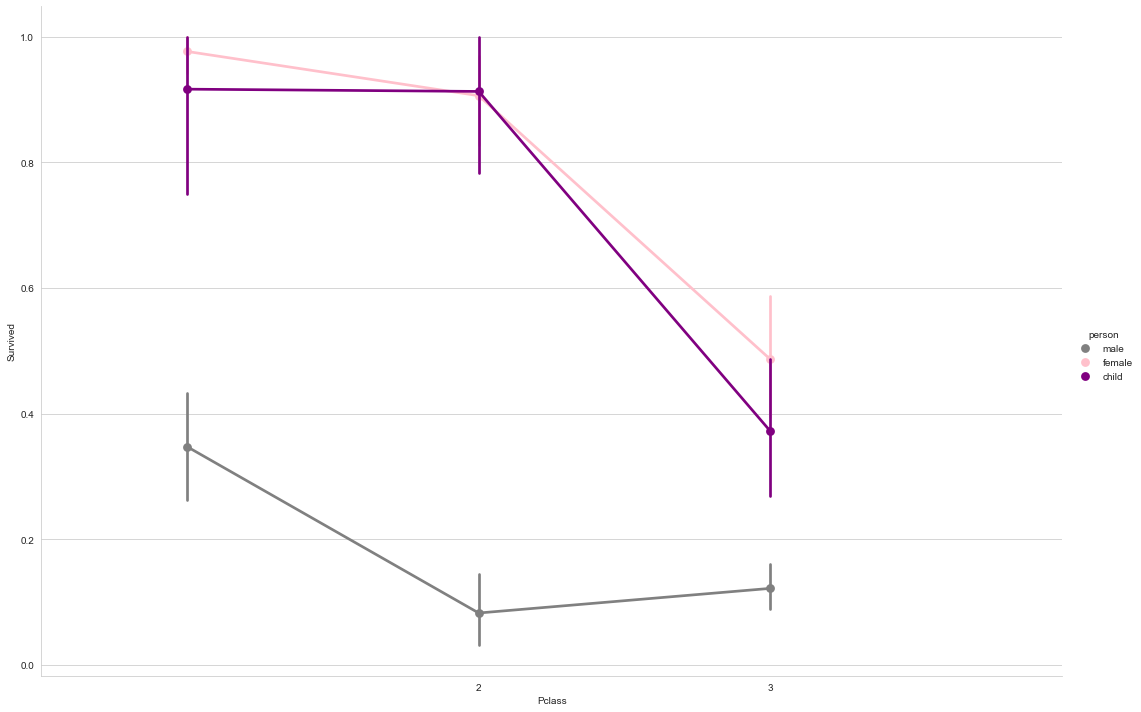

In [365]:
#### you see clearly from this plot that as the pclass increases the survivor rate decreases drastically

pl = sns.catplot(y='Survived',x='Pclass',data=titanic_df,palette=custom,kind='point',hue='person',height=10,aspect=1.5)

plt.xticks([1,2,3])

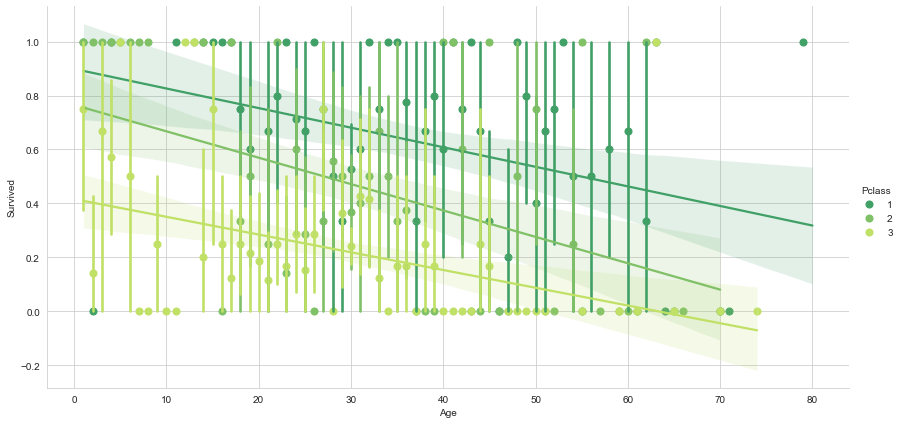

In [368]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='summer',x_bins=[range(1,80)],height=6,aspect=2)

#### even with linear model plot we see clear linear relationship between pclass and survivor rate

In [369]:
co_eff, p_value = pearsonr(titanic_df.Pclass,titanic_df.Survived)

In [370]:
co_eff

-0.33848103596101514

In [371]:
p_value                 #### definately related and not by chance

2.5370473879790813e-25

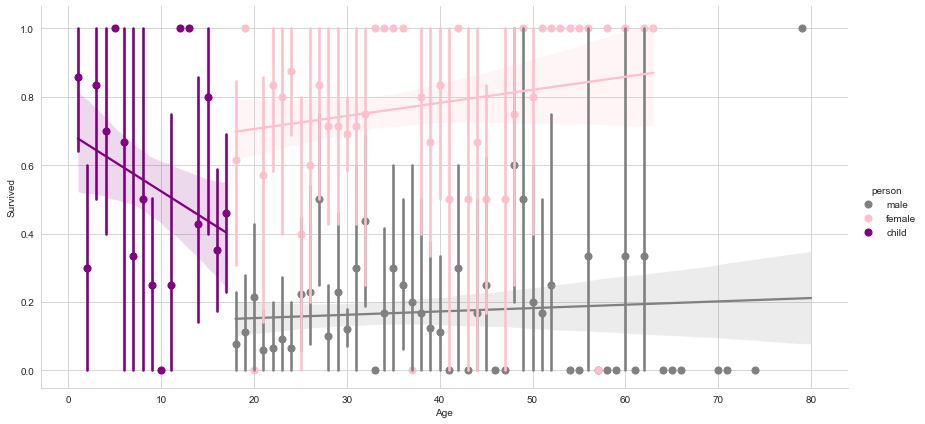

In [374]:
#### this is very telling because the older you are, it seems you were more likely to survive if you were female then male

custom = {'male':'grey',
          'female':'pink',
          'child':'purple'}

sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='person',palette=custom,x_bins=[range(1,80)],height=6,aspect=2)

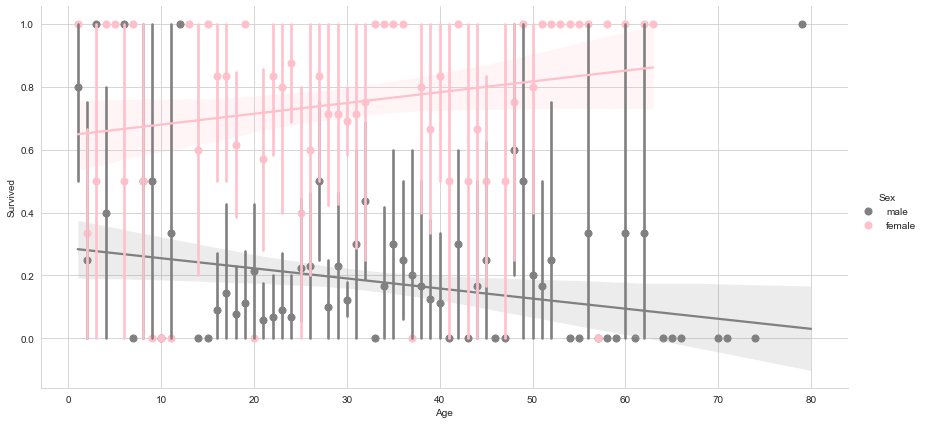

In [376]:
#### clearly see some sort of linear relationsip between survivor rate and gender, females were more likely to survive then males
custom = {'male':'grey',
          'female':'pink'}

sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Sex',palette=custom,x_bins=[range(1,80)],height=6,aspect=2)

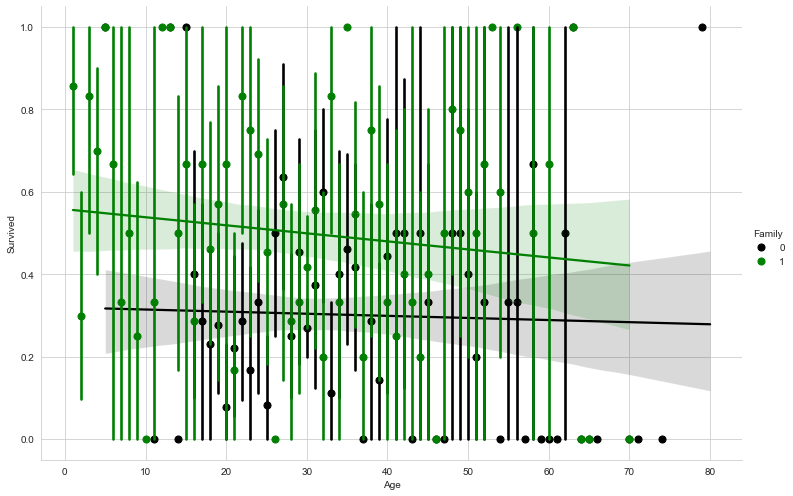

In [379]:
#### it seems like being a female was more likly to survive then being a male audience, INTERESTING

custom = {0:'black',
          1:'green'}

sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Family',palette=custom,x_bins=[range(1,80)],height=7,aspect=1.5)

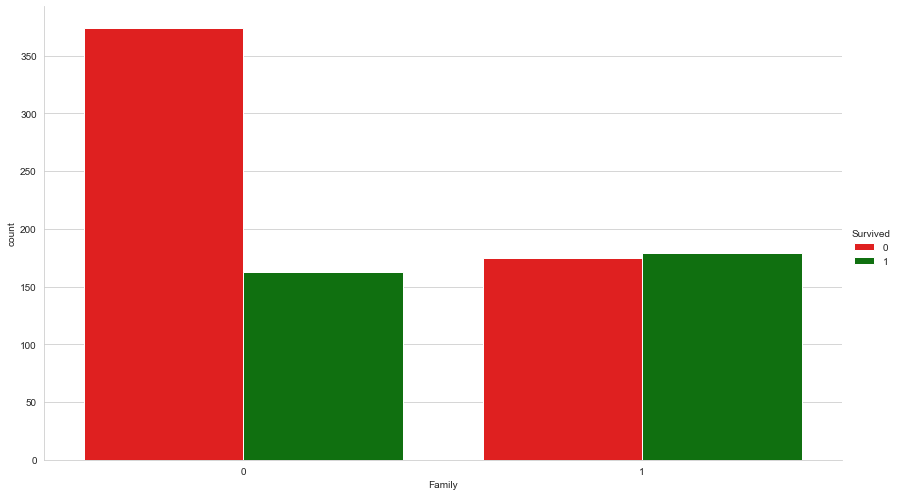

In [381]:
#### in the above plot we see alone were more correlated to not surviving then people with family

custom = {0:'red',
          1:'green'}

sns.catplot(x='Family',data=titanic_df,kind='count',hue='Survived',palette=custom,height=7,aspect=1.7)

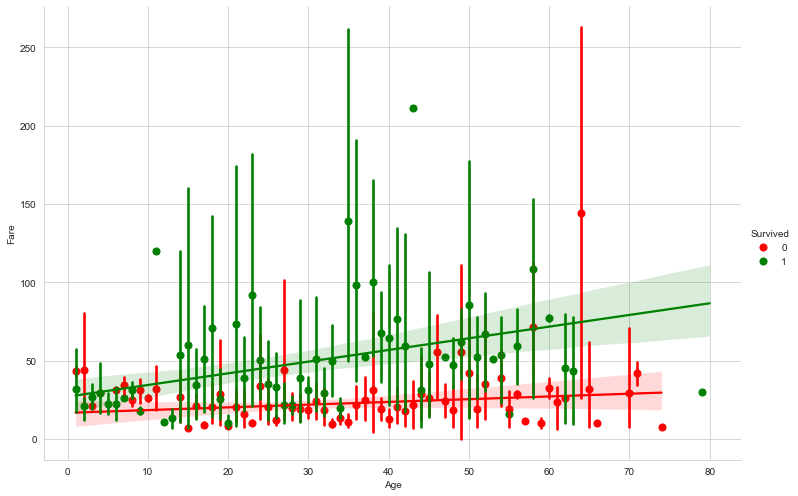

In [437]:
#### from the plot above it seems like if you were alone then the likelihood of survivor was low

custom = {0:'red',
          1:'green'}

sns.lmplot(x='Age',y='Fare',data=titanic_df,hue='Survived',x_bins=[range(1,80)],height=7,aspect=1.5,palette=custom)

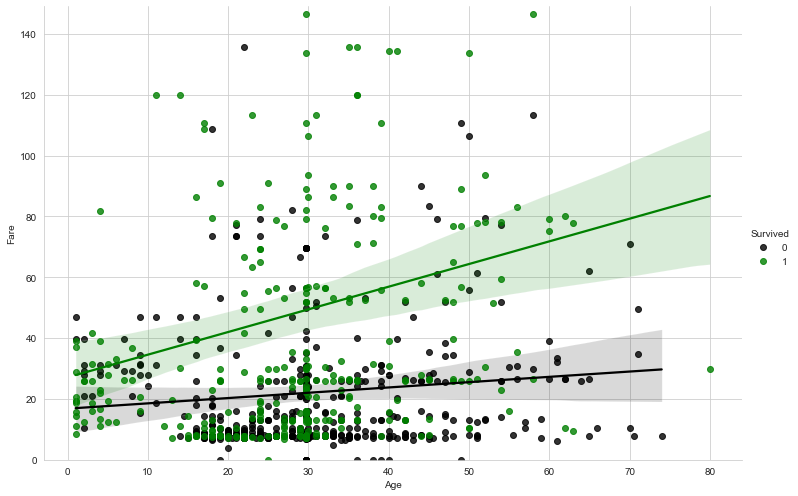

In [384]:
#### putting a ylimit on Fare because we know anything above z score 3 are outliers

custom = {0:'black',
          1:'green'}

pl = sns.lmplot(x='Age',y='Fare',data=titanic_df,hue='Survived',height=7,aspect=1.5,palette=custom)

pl.set(ylim=(0,titanic_df.Fare.std()*3))

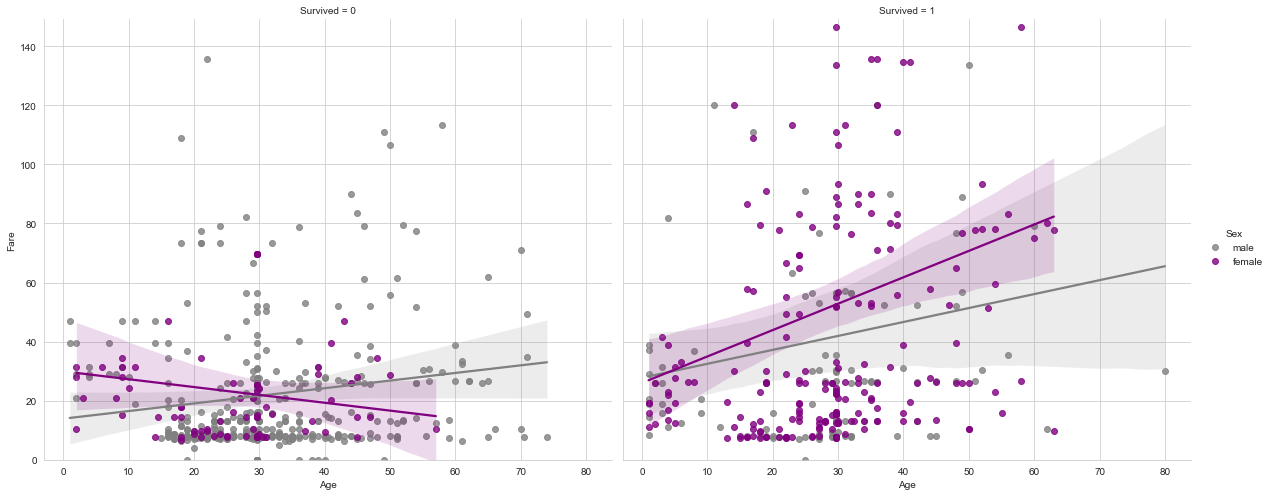

In [388]:
#### here we doing exact same plot but seperated by columns Survived, I honestly like the above one not this one though but we have the option if we wanna see more clearly what is going on

custom = {'male':'grey',
          'female':'purple'}

pl = sns.lmplot(x='Age',y='Fare',data=titanic_df,col='Survived',hue='Sex',height=7,aspect=1.2,palette=custom)

pl.set(ylim=(0,titanic_df.Fare.std()*3))

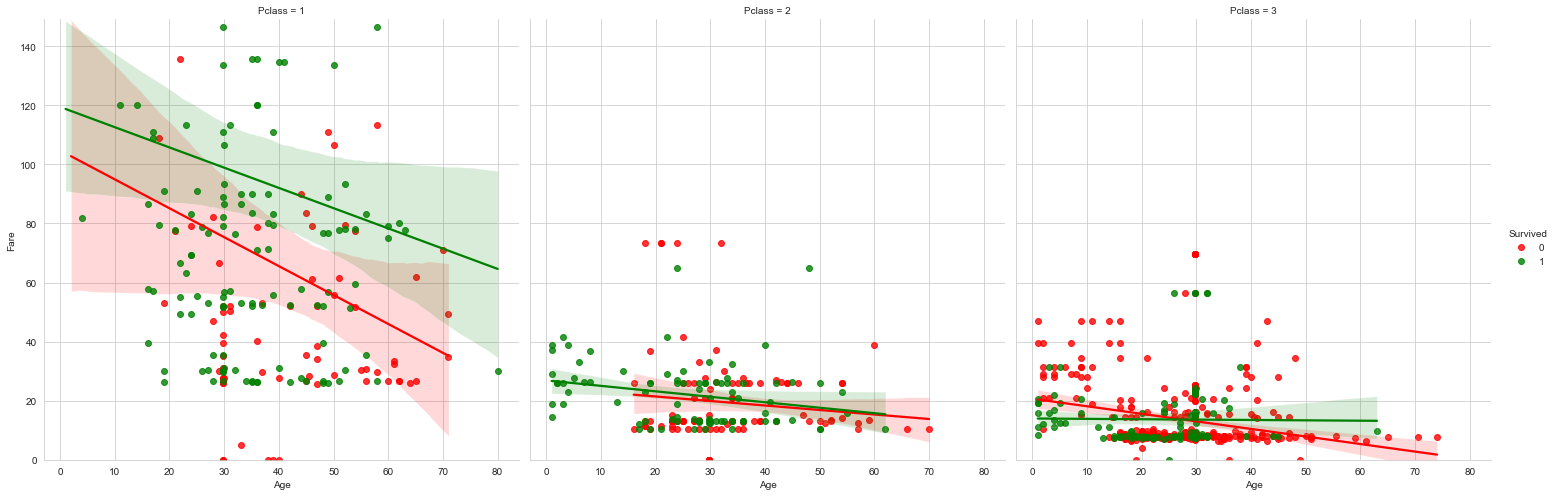

In [392]:
#### here we doing plot but seperated by columns Pclass, I honestly like the regular one not this one though but we have the option if we wanna see more clearly what is going on

custom = {0:'red',
          1:'green'}

pl = sns.lmplot(x='Age',y='Fare',data=titanic_df,col='Pclass',hue='Survived',height=7,aspect=1,palette=custom)

pl.set(ylim=(0,titanic_df.Fare.std()*3))

<AxesSubplot:xlabel='Age', ylabel='Fare'>

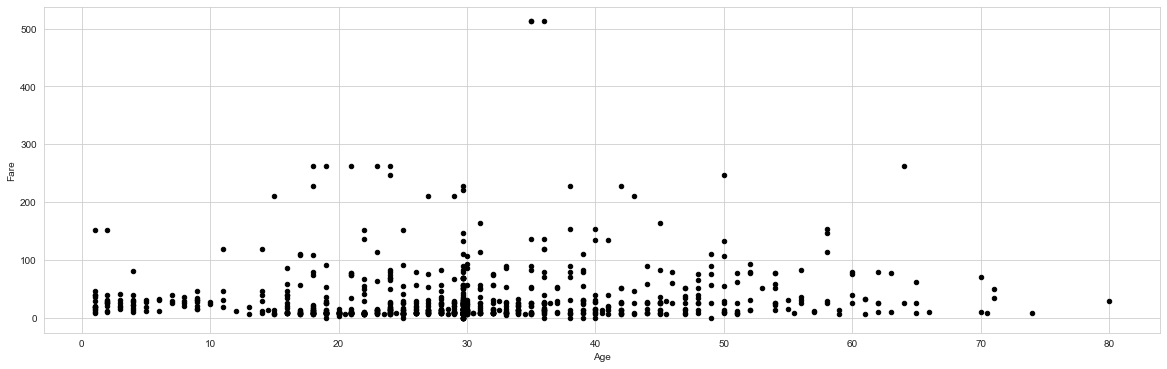

In [394]:
#### not a suprise that most of the people were in their 20s-30s and fare below 100

titanic_df.plot('Age','Fare',kind='scatter',figsize=(20,6),color='black')

In [395]:
#### we wanna quickly find out the correlation between any of the following columns, so first we need to convert them into binary

temp_df = titanic_df.copy()

In [397]:
temp_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male,0


In [398]:
temp_df.Embarked = temp_df.Embarked.map({'Southhampton':1,
                                         'Cherbourg':2,
                                         'Queenstown':3})

In [402]:
temp_df.Sex = temp_df.Sex.map({'male':0,
                               'female':1})

In [404]:
temp_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.250000,1,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.000000,1,0,PC 17599,71.283300,2,female,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.925000,1,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.100000,1,female,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.050000,1,male,0


In [405]:
corr_df = temp_df[['Survived','Pclass','Sex','Age','Fare','Embarked','Family']]

In [406]:
corr_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,1,1
1,1,1,1,38.0,71.2833,2,1
2,1,3,1,26.0,7.9250,1,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,1,0


In [407]:
corr_df = corr_df.corr()

In [408]:
corr_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
Survived,1.000000,-0.338481,0.543351,-0.069633,0.257307,0.111203,0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.331410,-0.549500,0.040138,-0.135207
Sex,0.543351,-0.131900,1.000000,-0.084209,0.182333,0.121266,0.303646
Age,-0.069633,-0.331410,-0.084209,1.000000,0.091565,0.013032,-0.179644
Fare,0.257307,-0.549500,0.182333,0.091565,1.000000,0.065492,0.271832


<AxesSubplot:>

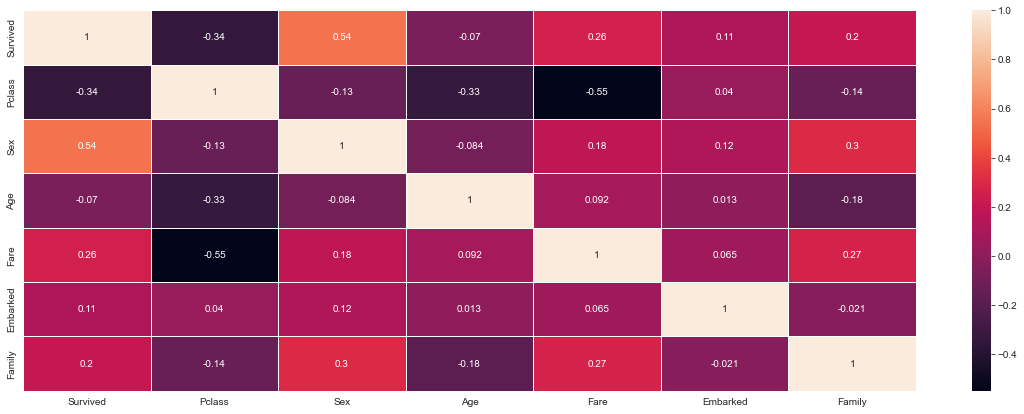

In [411]:
fig, ax = plt.subplots(figsize=(20,7)) 

sns.heatmap(corr_df,annot=True,linewidths=0.5,ax=ax)

#### from the plot it seems survival rate was somehow correlated with Sex, Fare, Family and Embarked

In [419]:
#### lets debunk this null hypothesis or accept null hypothesis, we will only do the one which seems the highest correlated column which is Sex but not to be biased we will go for Fare instead

co_eff,p_value = pearsonr(titanic_df.Survived,titanic_df.Fare)

In [420]:
p_value                  #### we reject null hypothesis

6.120189341917992e-15

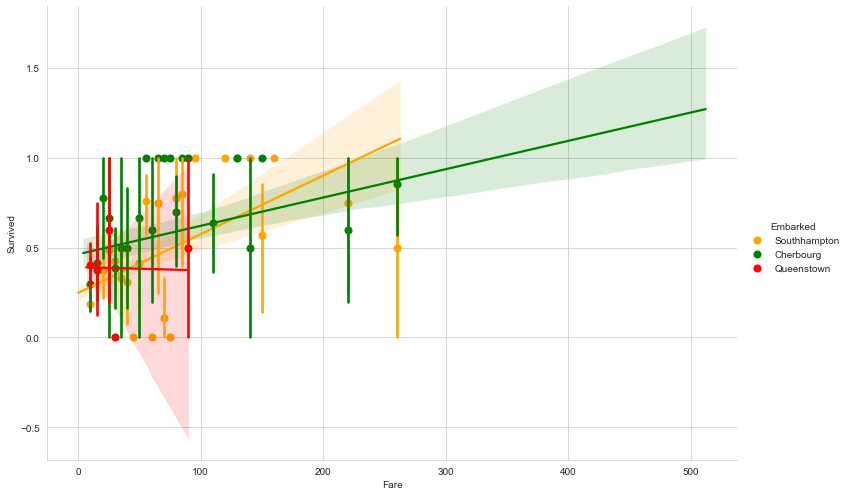

In [432]:

custom = {'Southhampton':'orange',
          'Cherbourg':'green',
          'Queenstown':'red'}

sns.lmplot(x='Fare',y='Survived',data=titanic_df,hue='Embarked',palette=custom,x_bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,220,260],height=7,aspect=1.5)

#### quite interesting as it seems people from Cherbough were more likely to survive then people from other 2 places, especially Queenstown has a linear regression below 0.5

In [433]:
#########################################################
################# Part VI - Fare
#########################################################

In [438]:
mean_df = titanic_df.Fare.mean()

std_df = titanic_df.Fare.std()

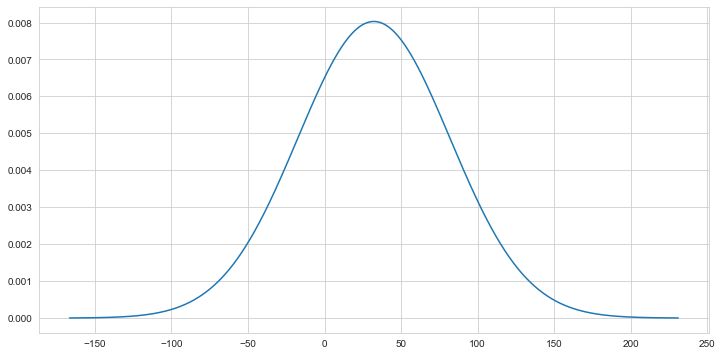

In [439]:
#### now we will make a nice standard deviation with z score along with mean value of people's fare in Titanic

x = np.linspace(titanic_df.Fare.mean() - 4*titanic_df.Fare.std(), titanic_df.Fare.mean() + 4*titanic_df.Fare.std(), 1000)
y = norm.pdf(x, titanic_df.Fare.mean(), titanic_df.Fare.std())

#### plot
plt.figure(figsize=(12, 6))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### this is very basic one but as we feeling fancy today so we will do a very comprehensive one

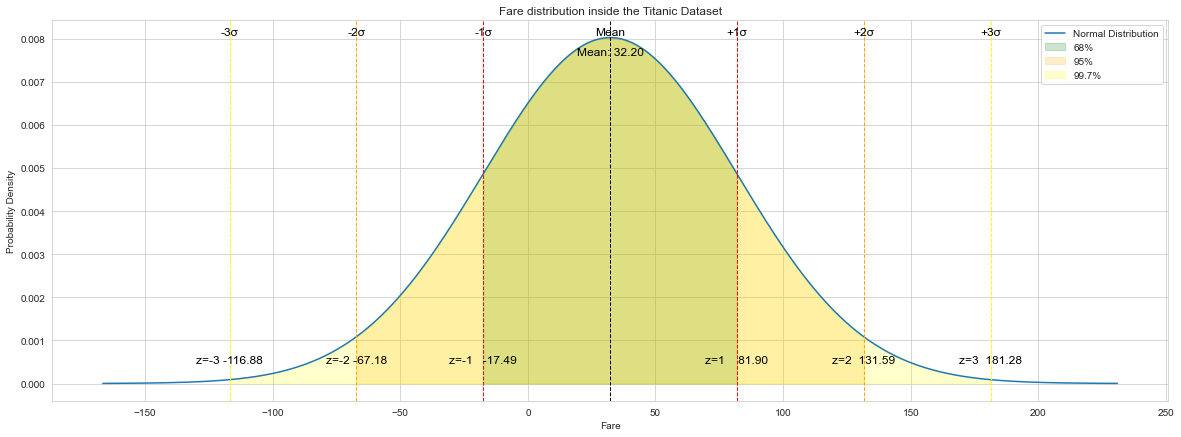

In [442]:
#### Comprehensive time

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='orange', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='yellow', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Fare distribution inside the Titanic Dataset')
plt.xlabel('Fare')
plt.ylabel('Probability Density')

plt.legend()

#### quite revealing that one below standard deviation the fare is already in minus so it means the majority of them paid less and were in pclass 3

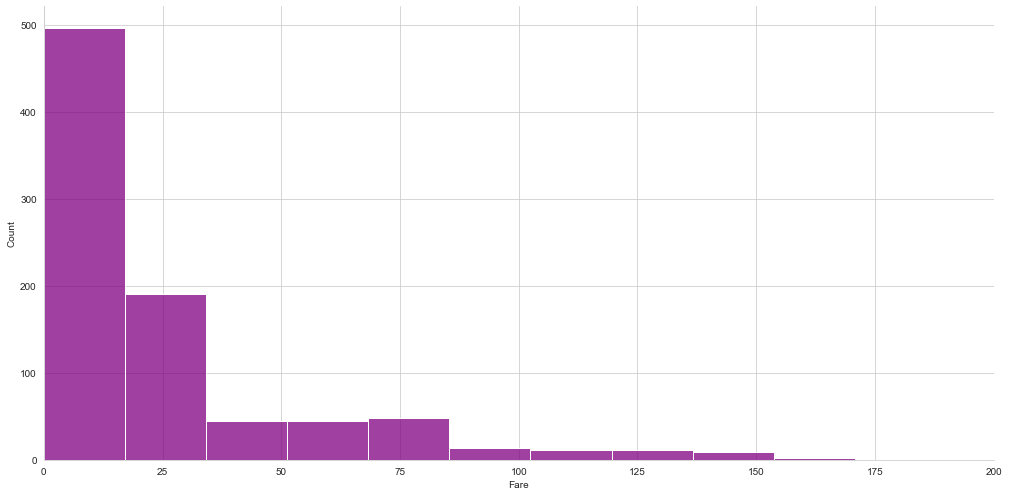

In [447]:
pl = sns.displot(x='Fare',data=titanic_df,bins=30,height=7,aspect=2,color='purple')

pl.set(xlim=(0,200))

#### yeah most of them paid between 0-25

In [448]:
titanic_df.Fare.max()     #### totally outlier

512.3292

In [449]:
titanic_df.Fare.min()     #### seems like few people might have boarded illegally or for free 

0.0

In [450]:
titanic_df[titanic_df.Fare == 0]         #### this is really questionable, it seems they boarded from Southhampton and all of them were males and alone
                                         #### either we can drop them or make it mean or keep it zero, in this case as they are small in numbers we wil keep it zero assuming they boarded the ship illegally

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,Southhampton,male,0
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,Southhampton,male,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,Southhampton,male,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,Southhampton,male,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,Southhampton,male,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,Southhampton,male,0
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,Southhampton,male,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,Southhampton,male,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,Southhampton,male,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,Southhampton,male,0


In [452]:
#### lets calculate the Z-score of passenger 1

Z = (titanic_df.Fare[1] - titanic_df.Fare.mean())/titanic_df.Fare.std()

print(Z)

0.7864036178345388


In [453]:
#### Z-score goes from -3 to 0 to +3, we usually only see 3 standard deviation and anything above that is termed as outliers
#### -3 meaning worst case and +3 meaning the best case if it was seen that, but here it will mean poor and rich

Z = (titanic_df.Fare.max() - titanic_df.Fare.mean())/titanic_df.Fare.std()

Z        #### definately outliers, its on standard deviation of +9

9.661740104981662

In [454]:
Z = (titanic_df.Fare.min() - titanic_df.Fare.mean())/titanic_df.Fare.std()       #### min fare is zero because it seems people had boarded it without paying

Z

-0.6480576784030059

In [455]:
Z = (titanic_df.Fare[25] - titanic_df.Fare.mean())/titanic_df.Fare.std()       #### just random selection to see whats their z score

Z

-0.016434928955997467

In [458]:
titanic_df.Fare[118]

247.5208

In [457]:
Z = (titanic_df.Fare[118] - titanic_df.Fare.mean())/titanic_df.Fare.std()

Z       #### seems like this person paid 248 which is at 4 levels above means so definately another outlier

4.332898697266388

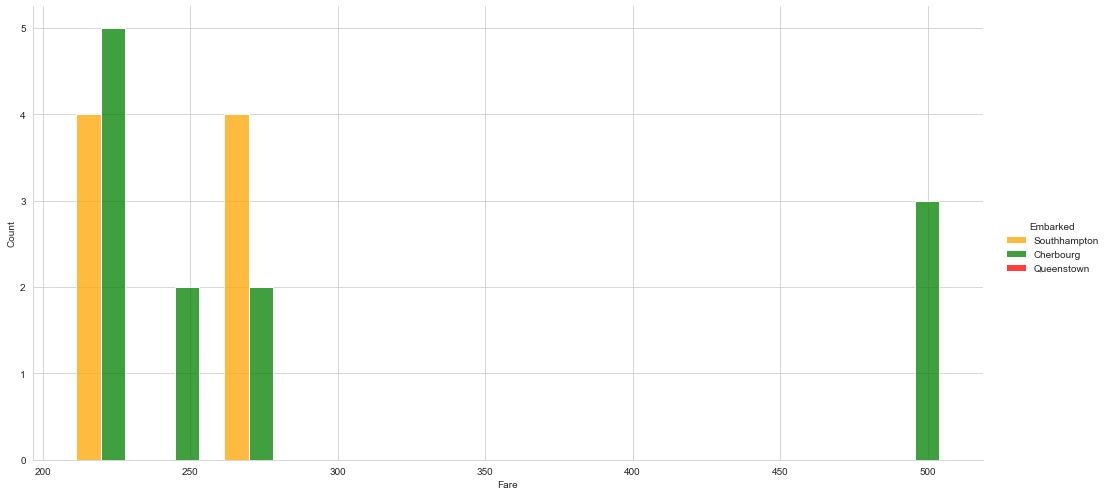

In [460]:
#### people who embarked with their z score above 3, in short has to be rich people
#### seems like nobody from Queenstown, just like our data had suggested before

custom = {'Southhampton':'orange',
          'Cherbourg':'green',
          'Queenstown':'red'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 3],data=titanic_df,hue='Embarked',height=7,aspect=2,multiple='dodge',palette=custom)

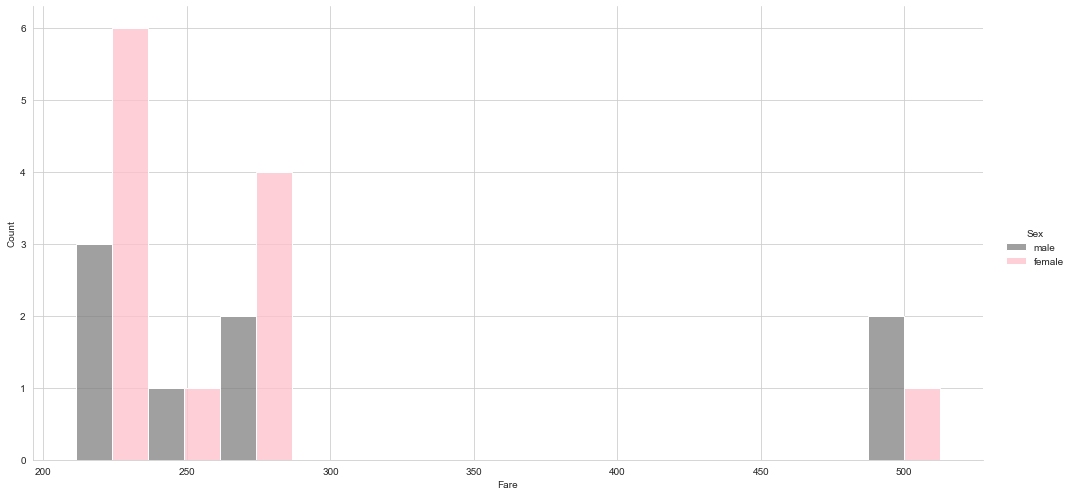

In [463]:
#### majority of people with z score above 3 were females, it correlates that survivor rate or female was higher then male

custom = {'male':'grey',
          'female':'pink'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 3],data=titanic_df,hue='Sex',height=7,aspect=2,multiple='dodge',palette=custom)

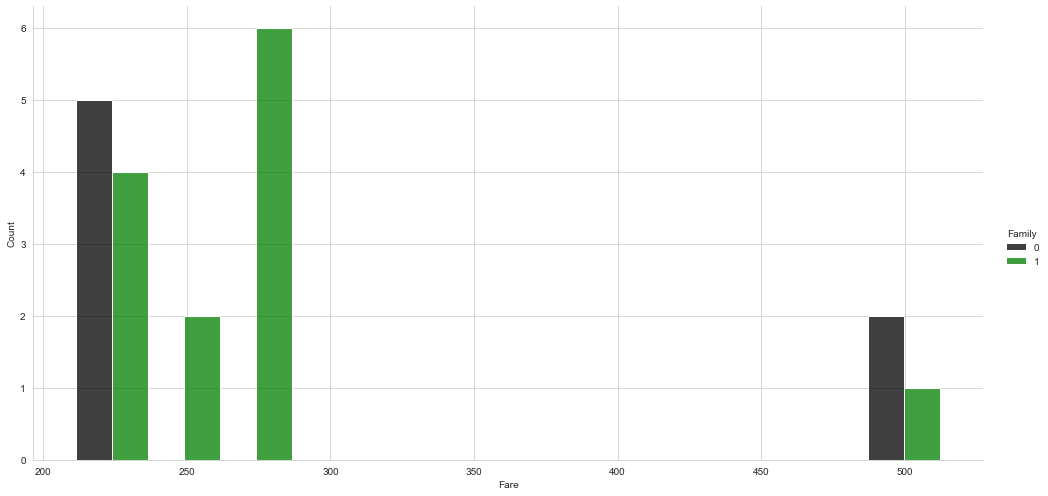

In [466]:
#### this wasn't something i was expecting but very interesting, lets do the with z score above 1 to really see how impactful was it

custom = {0:'black',
          1:'green'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 3],data=titanic_df,hue='Family',height=7,aspect=2,multiple='dodge',palette=custom)

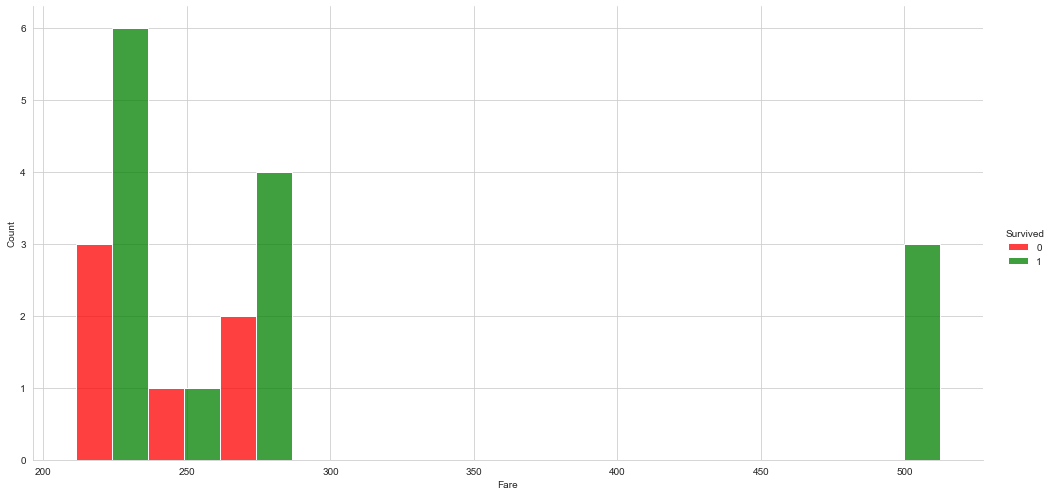

In [469]:
#### it seems like the person who paid the most survived, at least we can say he didn't waste his money

custom = {0:'red',
          1:'green'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 3],data=titanic_df,hue='Survived',height=7,aspect=2,multiple='dodge',palette=custom)

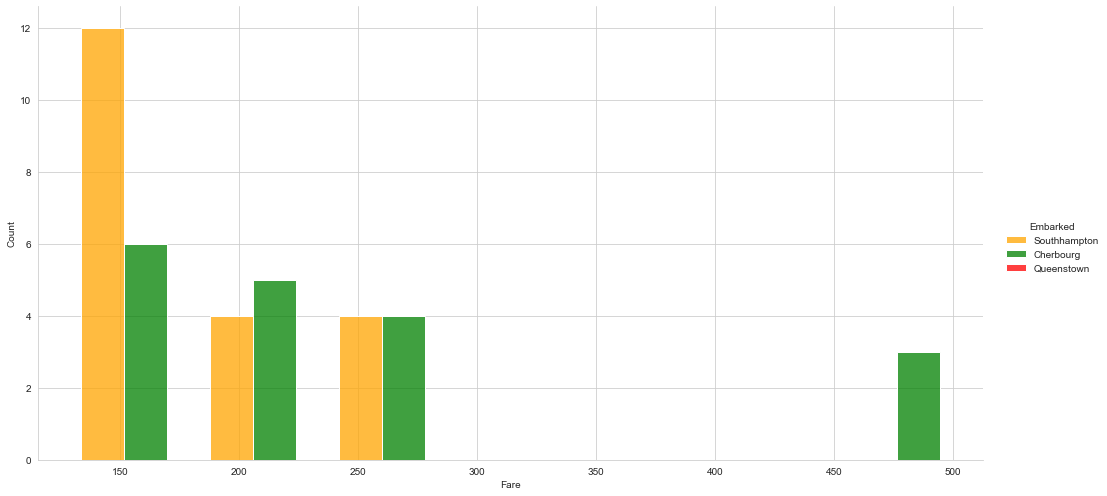

In [472]:
#### same nobody from Queenstown even on z score above 2

custom = {'Southhampton':'orange',
          'Cherbourg':'green',
          'Queenstown':'red'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 2],data=titanic_df,hue='Embarked',height=7,aspect=2,multiple='dodge',palette=custom)

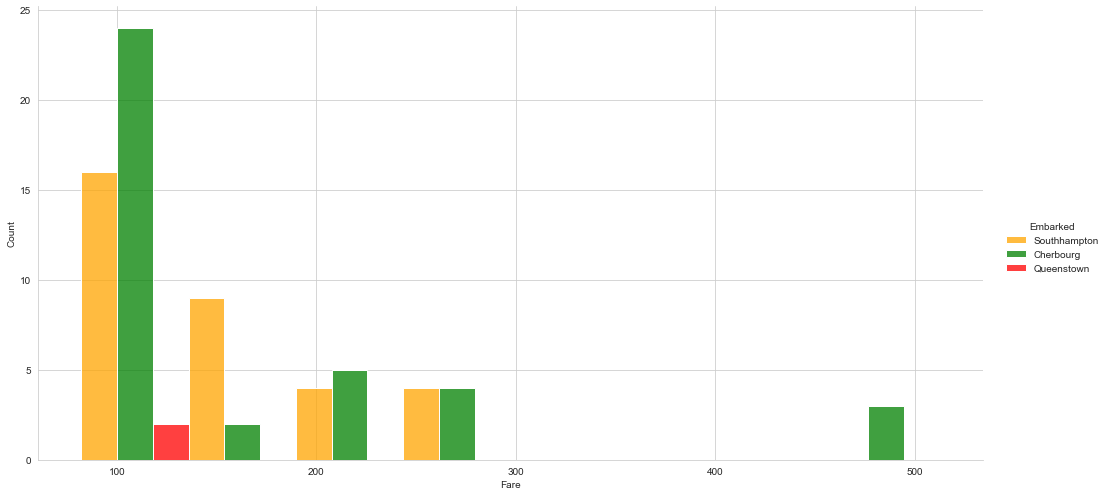

In [473]:
#### seems like there is only 1 person from Queenstown, its very likely Queenstown at that time was very poor economically

custom = {'Southhampton':'orange',
          'Cherbourg':'green',
          'Queenstown':'red'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 1],data=titanic_df,hue='Embarked',height=7,aspect=2,multiple='dodge',palette=custom)

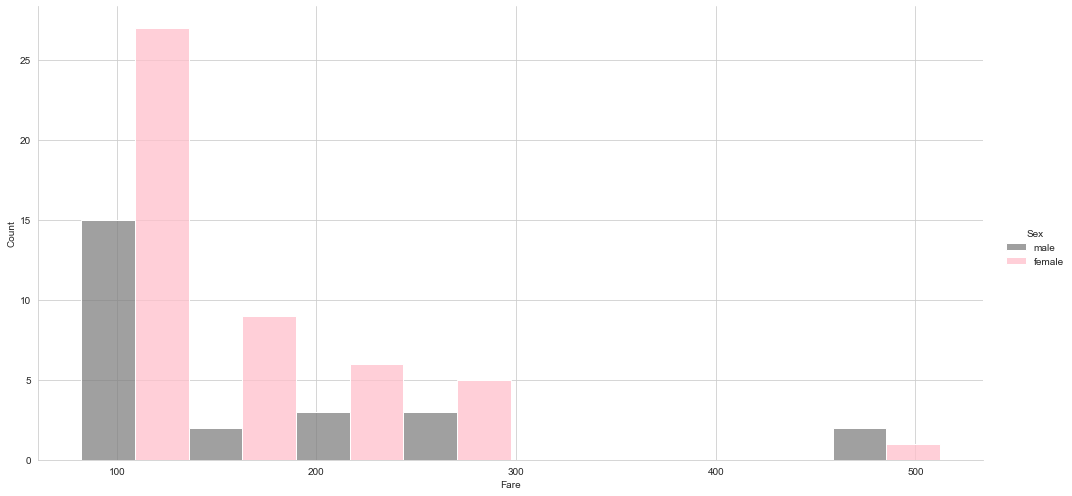

In [475]:
#### again we see high rise in females when it comes down to z score and from our correlation heat map its very clear

custom = {'male':'grey',
          'female':'pink'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 1],data=titanic_df,hue='Sex',height=7,aspect=2,multiple='dodge',palette=custom)

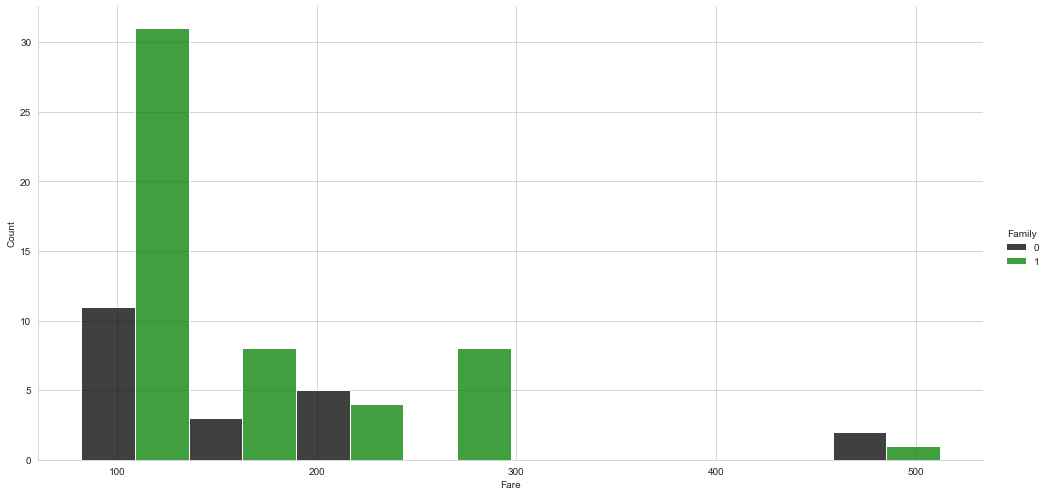

In [478]:
#### more people with family then alone people when z score about 1

custom = {0:'black',
          1:'green'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) > 1],data=titanic_df,hue='Family',height=7,aspect=2,multiple='dodge',palette=custom)

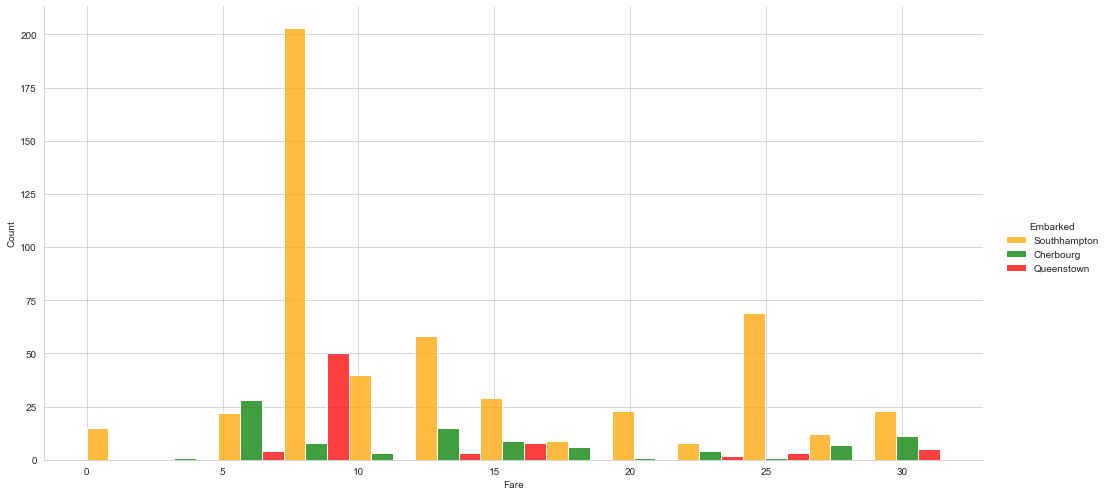

In [480]:
#### here is where the majority of people from Queenstown plots, meaning they paid around 10-13 fare currency at that time
#### second we notice the people who paid 0 from Southhampton
#### note max fare in here is the mean because z score is 0
#### around more then 200 people from Southhampton boarded titanic with their fares being between 5-10 fare currency, i think it was pound

custom = {'Southhampton':'orange',
          'Cherbourg':'green',
          'Queenstown':'red'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) < 0 ],data=titanic_df,hue='Embarked',height=7,aspect=2,multiple='dodge',palette=custom)

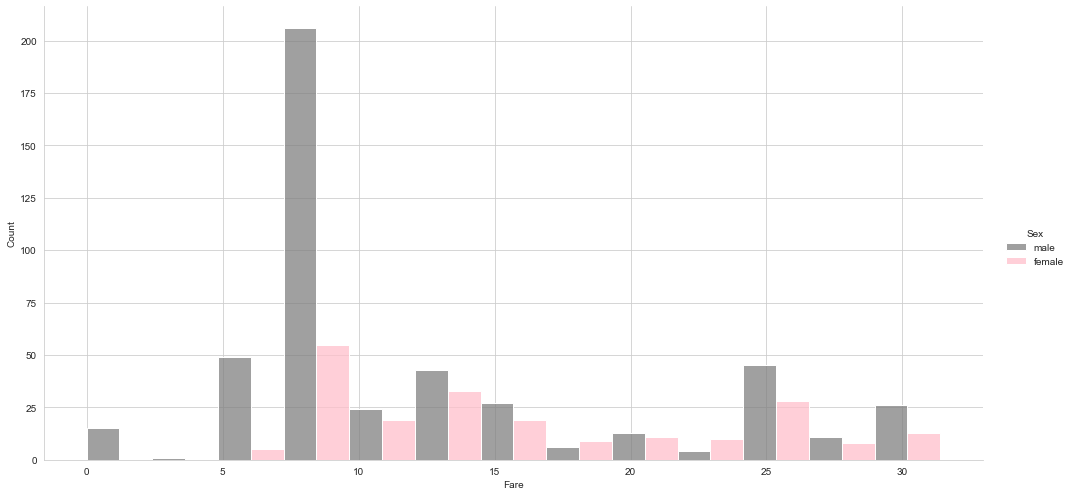

In [481]:
#### this is where males are dominent, more then 200 of them paying between 5-10, seems like they are from Southhampton
#### lets see if they were from southhampton

custom = {'male':'grey',
          'female':'pink'}

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) < 0 ],data=titanic_df,hue='Sex',height=7,aspect=2,multiple='dodge',palette=custom)

In [482]:
#### yeah our assumptions were right and it seems most people who paid less then mean or z score of 0 were from Queenstown

titanic_df[titanic_df.Fare < 30].groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Embarked,,,,,,,,
Cherbourg,437.895349,0.383721,2.651163,26.156669,0.313953,0.302326,13.899178,0.383721
Queenstown,420.253333,0.386667,2.960000,28.863424,0.400000,0.173333,11.230057,0.240000
Southhampton,446.673469,0.283673,2.571429,29.333963,0.310204,0.251020,13.107847,0.289796


In [485]:
titanic_df[titanic_df.Fare < 30]['Embarked'].value_counts()

Southhampton    490
Cherbourg        86
Queenstown       75
Name: Embarked, dtype: int64

In [486]:
#### we were right about the numbers being more then 200 from Southhampton

titanic_df[titanic_df.Fare < 10]['Embarked'].value_counts()

Southhampton    245
Queenstown       54
Cherbourg        37
Name: Embarked, dtype: int64

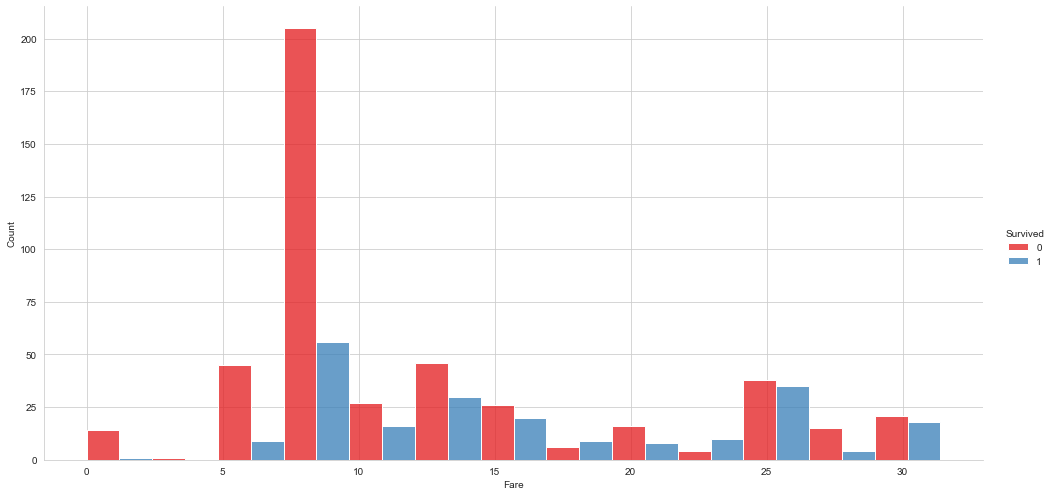

In [488]:
#### quite ironic it seems like those people who did board from Southhampton didn't survive

sns.displot(x=titanic_df.Fare[stats.zscore(titanic_df.Fare) < 0 ],data=titanic_df,palette='Set1',hue='Survived',height=7,aspect=2,multiple='dodge')

In [489]:
titanic_df.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Embarked,,,,,,,,
Cherbourg,445.364706,0.558824,1.876471,30.797450,0.382353,0.358824,60.189978,0.488235
Queenstown,417.896104,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030,0.259740
Southhampton,449.527950,0.336957,2.350932,29.482020,0.571429,0.413043,27.079812,0.389752


In [490]:
#### lets for the fun of it calculate the confidence level for the passengers fare inside the titanic
#### because we love stats here
#### in real life we usually take the sample from the population and do the confidence level, although this data set is not huge but for realistic measure lets take a sample

sample_titanic = titanic_df.sample(n=100,replace=True,random_state=42)

sample_titanic.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
102,103,0,1,"White, Mr. Richard Frasar",male,21.000000,0,1,35281,77.287500,Southhampton,male,1
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.000000,1,2,113760,120.000000,Southhampton,child,1
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.108300,Southhampton,male,1
270,271,0,1,"Cairns, Mr. Alexander",male,29.699118,0,0,113798,31.000000,Southhampton,male,0
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.650000,Southhampton,female,0


In [496]:
sample_titanic.count()

PassengerId    100
Survived       100
Pclass         100
Name           100
Sex            100
Age            100
SibSp          100
Parch          100
Ticket         100
Fare           100
Embarked       100
person         100
Family         100
dtype: int64

In [497]:
#### from this sample we will determine which region embarked was poor

standard_error = sample_titanic['Fare'].std()/np.sqrt(sample_titanic.shape[0])

In [498]:
#### 95% confidence interval people who boarded the titanic paid this much fare

stats.norm.interval(alpha=0.95,loc=sample_titanic.Fare.mean(),scale=standard_error)

(20.430723641854712, 34.492440358145295)

In [499]:
#### 99% confidence interval people who boarded the titanic paid this much fare

stats.norm.interval(alpha=0.99,loc=sample_titanic.Fare.mean(),scale=standard_error)

(18.221467829094813, 36.701696170905194)

In [500]:
#### now lets do it on the entire data set because its not a big data set

standard_error = titanic_df['Fare'].std()/np.sqrt(sample_titanic.shape[0])

In [501]:
#### 95% confidence interval

stats.norm.interval(alpha=0.95,loc=mean_df,scale=standard_error)

(22.464474936695865, 41.943941000453336)

In [502]:
#### 99% confidence interval

stats.norm.interval(alpha=0.99,loc=titanic_df.Fare.mean(),scale=standard_error)

(19.40402901113125, 45.00438692601795)

In [503]:
titanic_df.Fare.mean()

32.2042079685746

In [504]:
#### what will be more interesting is to see that confidence interval with regards to the fare in accordance to Embarkment

In [505]:
Queenstown_sample = titanic_df[titanic_df.Embarked=='Queenstown']

In [506]:
Queenstown_sample.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.458300,Queenstown,male,0
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.125000,Queenstown,child,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.029200,Queenstown,child,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.879200,Queenstown,female,0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,29.699118,0,0,335677,7.750000,Queenstown,female,0


In [507]:
standard_error = Queenstown_sample['Fare'].std()/np.sqrt(Queenstown_sample.shape[0])

In [508]:
#### with 99% confidence interval we can see people who boarded from Queenstown paid between 9.1-17.4 pounds fare

stats.norm.interval(alpha=0.99,loc=Queenstown_sample.Fare.mean(),scale=standard_error)

(9.111228106280226, 17.440831633979517)

In [509]:
Queenstown_sample.Fare.mean()

13.276029870129872

In [510]:
#### Southhampton City

Southhampton_sample = titanic_df[titanic_df.Embarked=='Southhampton']

In [511]:
Southhampton_sample.head().style.background_gradient(cmap='Dark2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,Southhampton,male,0


In [512]:
standard_error = Southhampton_sample['Fare'].std()/np.sqrt(Southhampton_sample.shape[0])

In [513]:
#### 99% confidence interval we can say that people who boarded from Southhampton paid around 23.4-30.7 pounds in fare

stats.norm.interval(alpha=0.99,loc=Southhampton_sample.Fare.mean(),scale=standard_error)

(23.43711250546368, 30.72251109702068)

In [514]:
Southhampton_sample.Fare.mean()

27.07981180124218

In [515]:
#### Cherbourg City

Cherbourg_sample = titanic_df[titanic_df.Embarked=='Cherbourg']

In [516]:
Cherbourg_sample.head().style.background_gradient(cmap='Dark2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,Cherbourg,child,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.225000,Cherbourg,female,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.225000,Cherbourg,male,0
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.720800,Cherbourg,male,0


In [517]:
standard_error = Cherbourg_sample['Fare'].std()/np.sqrt(Cherbourg_sample.shape[0])

In [518]:
#### wooow this is quite revealing, it seems only rich people boarded from this city
#### with 99% confidence interval we can say that

stats.norm.interval(alpha=0.99,loc=Cherbourg_sample.Fare.mean(),scale=standard_error)

(43.70519089729172, 76.67476439682594)

In [519]:
Cherbourg_sample.Fare.mean()

60.189977647058825

In [520]:
#### seems like the people who boarded from Cherbourg were the richest ones

#### but now we will do this with stats, null hypothesis and alternate hypothesis
#### if p-value < significance level (usually 0.05), we reject null hypothesis and say its not by chance but something is real for the occurance

Cherbourg_titanic = Cherbourg_sample.sample(n=50,replace=True,random_state=42)
Southhampton_titanic = Southhampton_sample.sample(n=50,replace=True,random_state=42)

In [521]:
Cherbourg_titanic.head().style.background_gradient(cmap='Dark2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.000000,0,2,13568,49.500000,Cherbourg,female,1
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.000000,1,0,36947,78.266700,Cherbourg,female,1
57,58,0,3,"Novel, Mr. Mansouer",male,28.500000,0,0,2697,7.229200,Cherbourg,male,0
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.000000,0,0,2620,7.225000,Cherbourg,male,0
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.000000,0,0,PC 17477,69.300000,Cherbourg,female,0


In [522]:
Southhampton_titanic.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.000000,2,2,W./C. 6608,34.375000,Southhampton,child,1
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.000000,0,0,PC 17582,153.462500,Southhampton,female,0
387,388,1,2,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.000000,Southhampton,female,0
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000000,1,0,113776,66.600000,Southhampton,female,1
102,103,0,1,"White, Mr. Richard Frasar",male,21.000000,0,1,35281,77.287500,Southhampton,male,1


In [523]:
Southhampton_titanic.Fare.mean()

52.379248

In [524]:
Cherbourg_titanic.Fare.mean()

69.39351000000002

In [525]:
Cherbourg_titanic.Fare.mean() - Southhampton_titanic.Fare.mean()

17.014262000000024

In [526]:
#### because p-value 0.32 > significance level 5% or 0.05 we accept the null hypothesis

stats.ttest_ind(a=Cherbourg_titanic.Fare,b=Southhampton_titanic.Fare,equal_var=False)

Ttest_indResult(statistic=0.9856901321363626, pvalue=0.3270429093346603)

In [527]:
#### now lets do the same but with Queenstown and Southhampton
#### we will reduce our sample size this time because queenstown doesn't have much people who boarded the ship

Queenstown_titanic = Queenstown_sample.sample(n=20,replace=True,random_state=42)
Southhampton_titanic = Southhampton_sample.sample(n=20,replace=True,random_state=42)

In [528]:
Southhampton_titanic.Fare.mean()

56.555414999999996

In [529]:
Queenstown_titanic.Fare.mean()

14.062295

In [530]:
#### wooow this has to be a major major difference, but we cant reject null hypothesis without proving it wrong
#### null hypothesis is something occuring by chance but for that p-value < significance level 
#### significance level is usually 5%

#### Null: there is no difference between economy of passengers boarding from Q and C
#### alternative : there is a difference between them
#### significance level : 5%

stats.ttest_ind(a=Southhampton_titanic.Fare,b=Queenstown_titanic.Fare,equal_var=False)

Ttest_indResult(statistic=2.899533655211778, pvalue=0.008933338376133715)

In [531]:
p_value = 0.008 * 100

In [532]:
p_value

0.8

In [1564]:
##### Null Hypothesis - Fare difference between Queenstown and Cherbourg people doesn't indicate or mean anything, its just by chance
##### Alternate Hypothesis - Fare difference between them means that Queenstown people at the time were econimically whclacking

#### because our p-value is 0.8% which is less then signigicance level of 5%, therefore we reject null hypothesis and accept alternative hypothesis
#### in other words p-value(0.008) < significance level(0.05), we reject null hypothesis

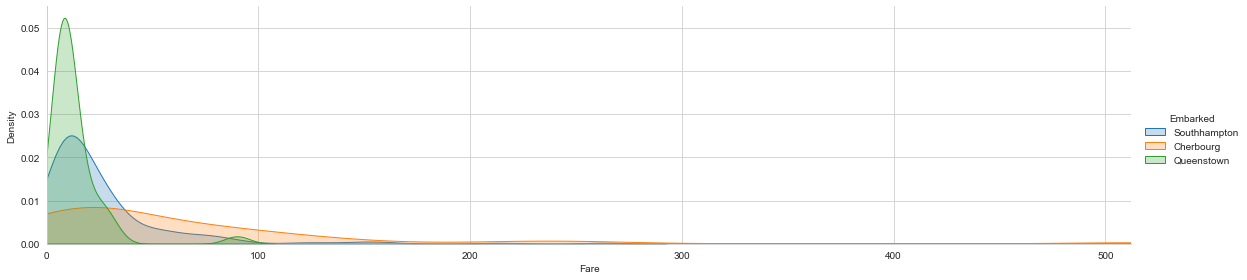

In [533]:
pl = sns.FacetGrid(titanic_df,hue='Embarked',aspect=4,height=4)

pl.map(sns.kdeplot,'Fare',fill=True)

pl.set(xlim=(0,titanic_df.Fare.max()))

pl.add_legend()

In [535]:
corr_coeff, p_value = pearsonr(titanic_df.Fare,titanic_df.Pclass)

In [536]:
corr_coeff

-0.5494996199439078

In [537]:
#### again we reject the null hypothesis here, the difference in fare and Pclass is not by coincidence obviously

p_value

1.967386173420501e-71

In [538]:
corr_coeff, p_value = pearsonr(titanic_df.Survived,titanic_df.Fare)

In [539]:
p_value             #### again we reject null hypothesis here

6.120189341917992e-15

In [ ]:
###################################################
########### PCA
###################################################

In [540]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southhampton,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southhampton,male,0


In [541]:
#### for PCA we will have to do some transformation especially the category columns

titanic_df.Sex = titanic_df.Sex.map({'male':0,
                                     'female':1})

titanic_df.Embarked = titanic_df.Embarked.map({'Southhampton':0,
                                               'Cherbourg':1,
                                               'Queenstown':2})

In [543]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.250000,0,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.000000,1,0,PC 17599,71.283300,1,female,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.925000,0,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.100000,0,female,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.050000,0,male,0


In [544]:
X = titanic_df.drop(columns=['PassengerId','Survived','Name','Ticket','person'])

In [545]:
X.head().style.background_gradient(cmap='Set2')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,0,22.000000,1,0,7.250000,0,1
1,1,1,38.000000,1,0,71.283300,1,1
2,3,1,26.000000,0,0,7.925000,0,0
3,1,1,35.000000,1,0,53.100000,0,1
4,3,0,35.000000,0,0,8.050000,0,0


In [546]:
y = titanic_df['Survived']

In [547]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [548]:
#### PCA time

from sklearn.preprocessing import StandardScaler

In [549]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [550]:
from sklearn.decomposition import PCA

In [551]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
final_df = pd.concat([principal_df, y], axis=1)


In [553]:
final_df.head()                     #### this is just a game changer, you can convert that whole column into 2 columns while keeping the classification intact
                                    #### usually used when the feature columns are just too many and you wanna reduce to less

,principal_component_1,principal_component_2,Survived
0,0.278943,-1.296705,0
1,1.380906,1.856631,1
2,-0.686462,-0.617786,1
3,1.339812,1.447825,1
4,-1.446635,-0.510841,0


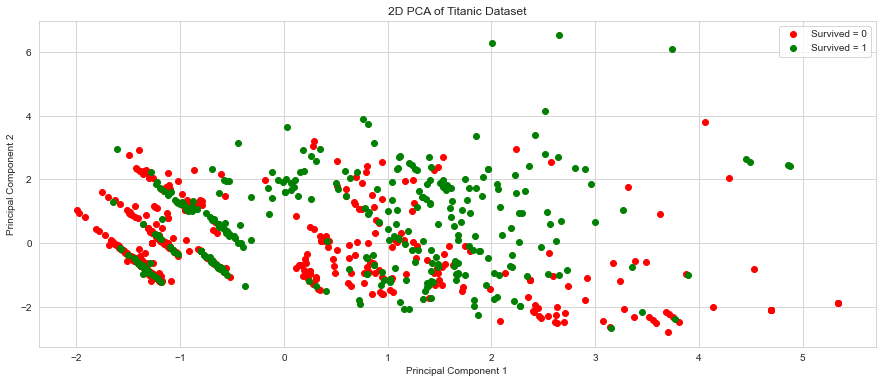

In [555]:
colors = {0: 'red', 1: 'green'}

plt.figure(figsize=(15, 6))

for i in final_df['Survived'].unique():
    subset = final_df[final_df['Survived'] == i]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                color=colors[i], label=f'Survived = {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Titanic Dataset')
plt.legend()
plt.grid(True)

#### see how you can make cluster or classfication with perfection with this method

In [556]:
pca.n_features_                   #### number of feature columns

8

In [558]:
pca.components_

array([[-0.12983858,  0.30492668, -0.17705172,  0.45908687,  0.49002995,
         0.31304401, -0.0207442 ,  0.55632488],
       [-0.65660127,  0.10858003,  0.48058486, -0.22300474, -0.12502886,
         0.50340277,  0.07217255, -0.04622547]])

In [559]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'], dtype='object')

In [561]:
df_comp = pd.DataFrame(pca.components_,columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'])

In [596]:
df_comp.head().style.background_gradient(cmap='Set2')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,-0.129839,0.304927,-0.177052,0.459087,0.490030,0.313044,-0.020744,0.556325
1,-0.656601,0.108580,0.480585,-0.223005,-0.125029,0.503403,0.072173,-0.046225
2,0.131984,0.475053,-0.150206,-0.149519,-0.090509,0.000284,0.837812,-0.043192
3,0.037904,-0.741239,0.117721,0.370222,-0.041410,0.187573,0.501949,0.096723


In [597]:
X.head().style.background_gradient(cmap='Set2')

,principal_component_1,principal_component_2,principal_component_3,principal_component_4
0,0.278943,-1.296705,-0.706546,0.426025
1,1.380906,1.856631,1.105048,-0.040003
2,-0.686462,-0.617786,0.465549,-1.620364
3,1.339812,1.447825,-0.178091,-0.925337
4,-1.446635,-0.510841,-0.632931,0.013280


<AxesSubplot:>

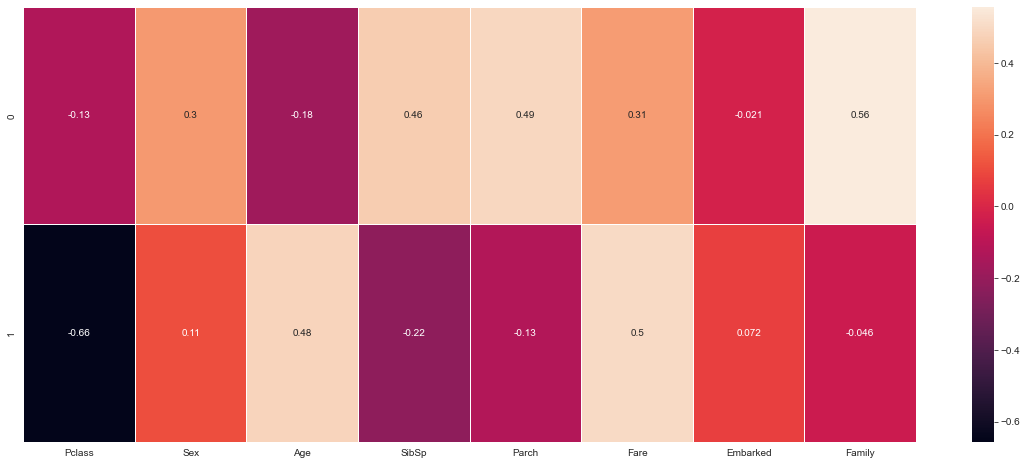

In [565]:
fig, ax = plt.subplots(figsize=(20,8))                     #### you see we have not given PCA the target column but even without that it was able to predict the correlation and make the cluster
                                                           #### its debatable what does 0 and 1 means here so to clarify we will make the model from this but this is the best method to see the correlation in my opinion
sns.heatmap(df_comp,ax=ax,linewidths=0.5,annot=True)

In [566]:
from sklearn.model_selection import train_test_split

In [568]:
final_df.head().style.background_gradient(cmap='Set2')

,principal_component_1,principal_component_2,Survived
0,0.278943,-1.296705,0
1,1.380906,1.856631,1
2,-0.686462,-0.617786,1
3,1.339812,1.447825,1
4,-1.446635,-0.510841,0


In [570]:
X = final_df.drop(columns='Survived')

In [571]:
X.head()

,principal_component_1,principal_component_2
0,0.278943,-1.296705
1,1.380906,1.856631
2,-0.686462,-0.617786
3,1.339812,1.447825
4,-1.446635,-0.510841


In [572]:
y = final_df['Survived']

In [573]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [575]:
from sklearn.linear_model import LogisticRegression         #### for classification

In [576]:
model = LogisticRegression()

In [577]:
model.fit(X_train,y_train)

LogisticRegression()

In [578]:
y_predict = model.predict(X_test)

In [579]:
from sklearn import metrics

In [580]:
print(metrics.classification_report(y_test,y_predict))          #### if we make PCA into 2 feature columns then we get a bad model and prediction
                                                                #### we can easily increase the metrics if we increase the principal components

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       157
           1       0.73      0.46      0.56       111

    accuracy                           0.71       268
   macro avg       0.71      0.67      0.67       268
weighted avg       0.71      0.71      0.69       268



In [581]:
metrics.accuracy_score(y_test,y_predict)

0.7052238805970149

In [583]:
#### principal components now being 4 instead of 2

pca = PCA(n_components=4)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2','principal_component_3', 'principal_component_4'])
final_df = pd.concat([principal_df, y], axis=1)


In [584]:
final_df.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,Survived
0,0.278943,-1.296705,-0.706546,0.426025,0
1,1.380906,1.856631,1.105048,-0.040003,1
2,-0.686462,-0.617786,0.465549,-1.620364,1
3,1.339812,1.447825,-0.178091,-0.925337,1
4,-1.446635,-0.510841,-0.632931,0.013280,0


In [588]:
X = final_df.drop(columns='Survived')

X.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4
0,0.278943,-1.296705,-0.706546,0.426025
1,1.380906,1.856631,1.105048,-0.040003
2,-0.686462,-0.617786,0.465549,-1.620364
3,1.339812,1.447825,-0.178091,-0.925337
4,-1.446635,-0.510841,-0.632931,0.013280


In [589]:
y = final_df['Survived']

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [591]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [592]:
y_predict = model.predict(X_test)

In [594]:
print(metrics.classification_report(y_test,y_predict))          #### we were easily able to improve the model report with adding more principal component
                                                                #### usually PCA is used for to see correlation with different feature columns while keeping the principal component being 2 so it can make a good cluster
                                                                #### its not used for to make models though but here we did it just for fun

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       157
           1       0.78      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [595]:
metrics.accuracy_score(y_test,y_predict)

0.7947761194029851

In [600]:
#############################################
############ Model - Classification
############################################

In [612]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.250000,0,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.000000,1,0,PC 17599,71.283300,1,female,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.925000,0,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.100000,0,female,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.050000,0,male,0


In [613]:
#### to make it a bit challenging we will revert back the Sex and Embarked columns to their initial category instead of num

titanic_df.Sex = titanic_df.Sex.map({0:'male',
                                     1:'female'})

titanic_df.Embarked = titanic_df.Embarked.map({0:'Southhampton',
                                               1:'Cherbourg',
                                               2:'Queenstown'})

In [614]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male,0


In [615]:
X = titanic_df.drop(columns=['PassengerId','Name','Ticket','person','Family','Survived'])

X.head()              #### feature columns

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,Southhampton
1,1,female,38.0,1,0,71.2833,Cherbourg
2,3,female,26.0,0,0,7.9250,Southhampton
3,1,female,35.0,1,0,53.1000,Southhampton
4,3,male,35.0,0,0,8.0500,Southhampton


In [616]:
y = titanic_df['Survived']

y.head()               #### target

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [617]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [618]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['Sex', 'Embarked']),
                                               ('num', StandardScaler(),['Pclass','Age','Fare','SibSp','Parch'])
                                              ]
                                )


#### this is my preferred method, I honestly don't like dummy variables, it makes the whole data frame so complicated and then you also have issues with collinearity
#### coming from R and its amazing factor() function I had to find something similar in python and so far this the best and closest to factor()
#### if you know better method then this please chip in

In [619]:
from sklearn.pipeline import Pipeline

In [620]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [622]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'SibSp', 'Parch'])])),
                ('classifier', LogisticRegression())])

In [623]:
y_predict = model.predict(X_test)

In [624]:
metrics.accuracy_score(y_test,y_predict)           #### much better for our first very basic model

0.8097014925373134

In [625]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [626]:
metrics.confusion_matrix(y_test,y_predict)

array([[136,  21],
       [ 30,  81]], dtype=int64)

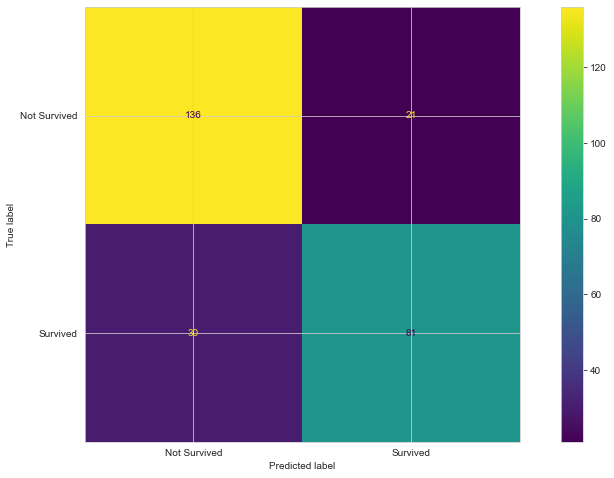

In [635]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Not Survived','Survived']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(15,8))

disp.plot(ax=ax)

In [647]:
###########################################
###### Random Forest
###########################################

In [636]:
from sklearn.ensemble import RandomForestClassifier

In [637]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [638]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'SibSp', 'Parch'])])),
                ('classifier', RandomForestClassifier())])

In [639]:
y_predict = model.predict(X_test)

In [640]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [641]:
metrics.accuracy_score(y_test,y_predict)             #### usually Randomforest is much better then basic LogisticRegression but in this one it came short, but if the data is massive Randomforest will always shine anytime of the day

0.7947761194029851

In [642]:
from sklearn.model_selection import GridSearchCV


In [643]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
model_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'Embarked']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch'])])

In [644]:
best_model = model_grid.best_estimator_

In [645]:
y_predict = best_model.predict(X_test)

In [646]:
metrics.accuracy_score(y_test,y_predict)             #### same like with basic LogisticClassifier

0.8097014925373134

In [648]:
###############################################
###### KNN
###############################################

In [649]:
from sklearn.neighbors import KNeighborsClassifier

In [650]:
%%time

k_range = range(1,100)

accuracy = []

for i in k_range:
    
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))
    ]) 
    
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

Wall time: 2.18 s


Text(0, 0.5, 'Accuracy')

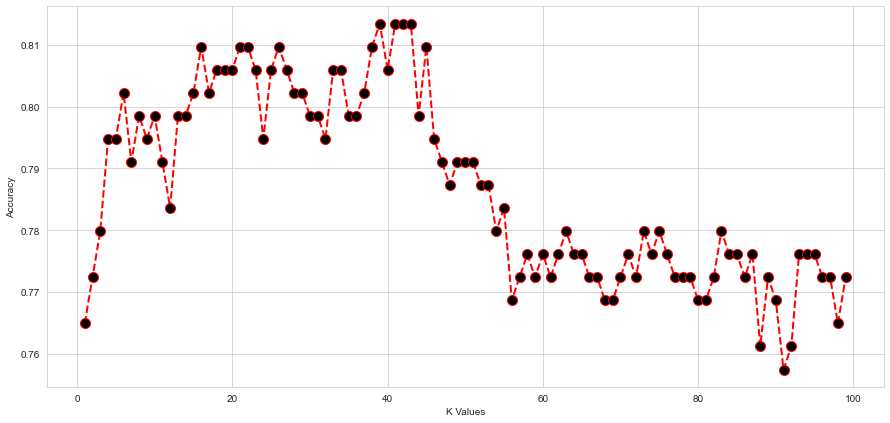

In [651]:
plt.figure(figsize=(15,7))

plt.plot(k_range,accuracy,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=10,markerfacecolor='black')

plt.xlabel('K Values')

plt.ylabel('Accuracy')

In [658]:
#### we know the best accuracy is between 30 and 50 from the plot


k_range = range(30,50)

accuracy = []

for i in k_range:
    
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))
    ]) 
    
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

Text(0, 0.5, 'Accuracy')

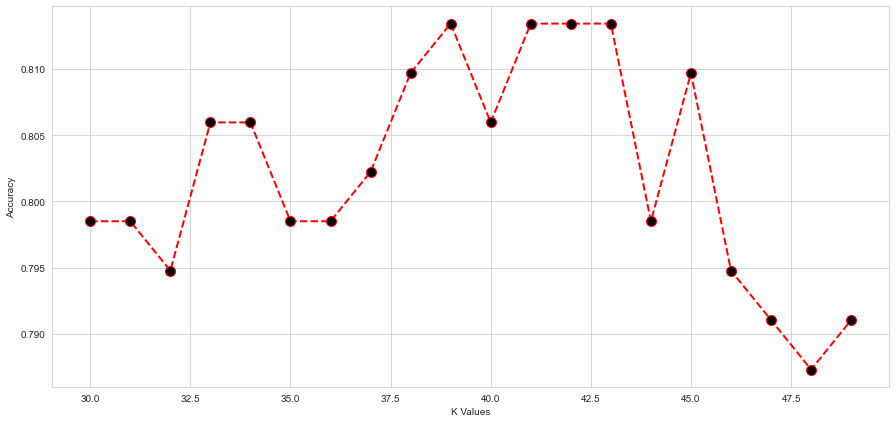

In [659]:
plt.figure(figsize=(15,7))

plt.plot(k_range,accuracy,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=10,markerfacecolor='black')

plt.xlabel('K Values')

plt.ylabel('Accuracy')

In [660]:
#### lets go for 41 k value 

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=41))
    ]) 
    
model.fit(X_train,y_train)
    
y_predict = model.predict(X_test)
    

In [661]:
metrics.accuracy_score(y_test,y_predict)                  #### best one yet we have so far

0.8134328358208955

In [662]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



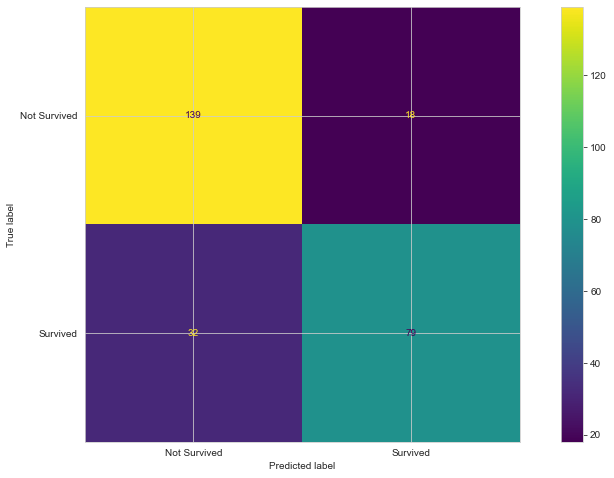

In [663]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Not Survived','Survived']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(15,8))

disp.plot(ax=ax)

In [664]:
##################################
#### Advanced methods
##################################

In [665]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [666]:
import xgboost as xgb

In [667]:
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

In [669]:
from sklearn.model_selection import RandomizedSearchCV

In [670]:
%%time

random_search_xgb = RandomizedSearchCV(clf_xgb, param_grid_xgb, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train, y_train)


Wall time: 1min 27s


In [671]:
best_model = random_search_xgb.best_estimator_

In [672]:
y_predict = best_model.predict(X_test)

In [673]:
metrics.accuracy_score(y_test,y_predict)             #### yeah a bit of better accuracy, we don't get much bigger leap after one point so you have to know when to stop

0.8134328358208955

In [675]:
print(metrics.classification_report(y_test,y_predict))          #### but here we see the recall drops, it really depends on the model and what you value more

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.86      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [676]:
from sklearn.ensemble import StackingClassifier

In [677]:
base_models = [
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [679]:
%%time

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

model.fit(X_train, y_train)


Wall time: 1.85 s


In [680]:
y_predict = model.predict(X_test)

In [682]:
metrics.accuracy_score(y_test, y_predict)           #### just ok not great though

0.8097014925373134

In [683]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [691]:
titanic_df.head().style.background_gradient(cmap='Set2')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,Southhampton,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,Cherbourg,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,Southhampton,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,Southhampton,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,Southhampton,male,0


In [692]:
######################################################
#### Linear Regression
######################################################

In [693]:
#### Note we don't do linear regression or prediction of contineous data like Age or Fare on titanic dataset which you will find out soon why
#### we are doing this just because we love stats

In [694]:
X = titanic_df.drop(columns=['PassengerId','Name','Ticket','Fare','person','Family'])

In [695]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,Southhampton
1,1,1,female,38.0,1,0,Cherbourg
2,1,3,female,26.0,0,0,Southhampton
3,1,1,female,35.0,1,0,Southhampton
4,0,3,male,35.0,0,0,Southhampton


In [696]:
y = titanic_df['Fare']

y.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [698]:
from sklearn.linear_model import LinearRegression

In [699]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['Sex', 'Embarked']),
                                               ('num', StandardScaler(),['Survived','Pclass','Age','SibSp','Parch'])
                                              ]
                                )


In [700]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [701]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())
                       ])

In [702]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('num', StandardScaler(),
                                                  ['Survived', 'Pclass', 'Age',
                                                   'SibSp', 'Parch'])])),
                ('regressor', LinearRegression())])

In [703]:
y_predict = model.predict(X_test)

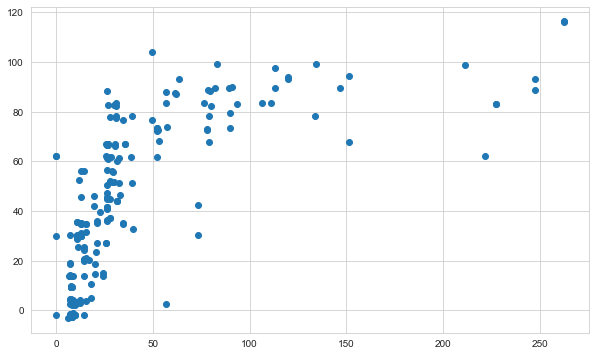

In [704]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict)

Text(0, 0.5, 'difference between predict and actual aka Residual')

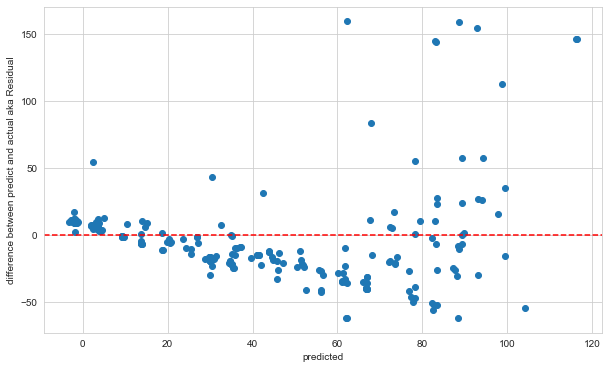

In [712]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals)

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just not a good model honestly

In [705]:
metrics.r2_score(y_test,y_predict)                             #### R2, not a good model, this is the reason we dont use linear or to predict contineous value for Titanic

0.47665056728662913

In [706]:
metrics.mean_squared_error(y_test,y_predict)                   #### MSE

1128.6501412885355

In [707]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))           #### it means we are off by this much while predicting, which is quite a lot

33.59538869083874

In [713]:
#### seems like its proving hard for the model to predict and also from the residual diagram it seems linear regression is not the best model for this
#### also do remember we are trying to predict the contineous data here but usually titanic data set is used to predict Survived column using Logistic Regression or similar
#### lets do one last Gridsearch and hop on to survival prediction using Discreate prediction models

In [714]:
from sklearn.model_selection import GridSearchCV

In [715]:
from sklearn.ensemble import RandomForestRegressor

In [717]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [718]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [719]:
%%time

grid_model = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_model.fit(X_train, y_train)

Wall time: 2min 15s


In [720]:
best_model = grid_model.best_estimator_


In [721]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('num', StandardScaler(),
                                                  ['Survived', 'Pclass', 'Age',
                                                   'SibSp', 'Parch'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                                       n_estimators=200, random_state=42))])

In [722]:
y_predict = best_model.predict(X_test)

In [723]:
metrics.r2_score(y_test,y_predict)              #### better then the last linear model

0.5502201782942806

In [725]:
metrics.mean_squared_error(y_test,y_predict)

969.9906555452789

In [727]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_predict))    #### this means we are off by this much in pretending the models target
                                                                #### this value should be as low as possible
rmse

31.14467298825401

Text(0, 0.5, 'difference between predict and actual aka Residual')

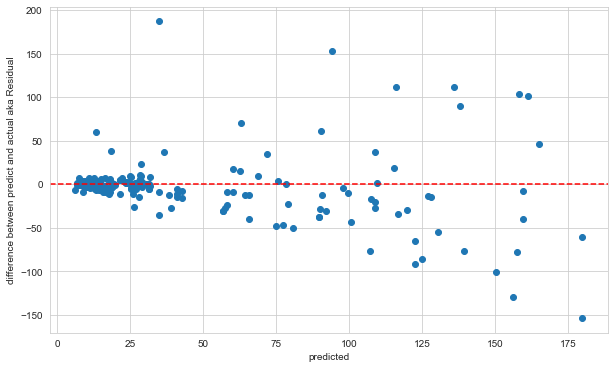

In [728]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals)

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### you van visually see that this model is far better then the last one we had

Text(0, 0.5, 'predicted fare')

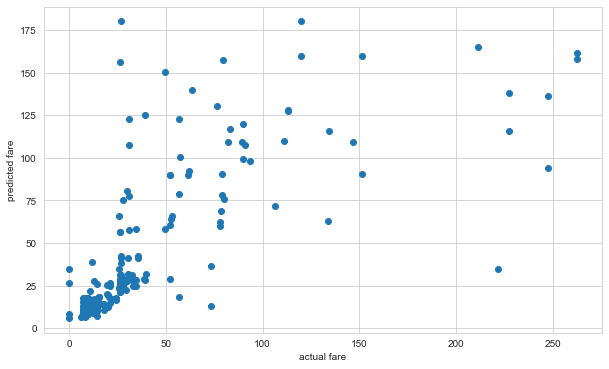

In [729]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict)

plt.xlabel('actual fare')

plt.ylabel('predicted fare')

In [730]:
from xgboost import XGBRegressor

In [731]:
from sklearn.model_selection import RandomizedSearchCV

In [734]:
from scipy.stats import randint

In [736]:
from scipy.stats import uniform

In [732]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [737]:
param_grid = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 10),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

In [738]:
random_model = RandomizedSearchCV(model, param_grid, cv=5, scoring='r2', n_iter=100, random_state=42)

In [740]:
%%time

random_model.fit(X_train, y_train)

Wall time: 8min 7s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['Sex',
                                                                                'Embarked']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['Survived',
                                                                                'Pclass',
                                                                                'Age',
                                                                                'SibSp',
         

In [741]:
best_model = random_model.best_estimator_

In [742]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('num', StandardScaler(),
                                                  ['Survived', 'Pclass', 'Age',
                                                   'SibSp', 'Parch'])])),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7962072844310213,
                              early_stopping_rounds=N...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.02393512381599932, max_bin=256,
                              max_cat_to_onehot=4, max

In [743]:
y_predict = best_model.predict(X_test)

In [744]:
metrics.mean_squared_error(y_test,y_predict)

993.8512657608896

In [746]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

31.52540667082488

In [745]:
metrics.r2_score(y_test,y_predict)

0.5391561325251654

Text(0, 0.5, 'difference between predict and actual aka Residual')

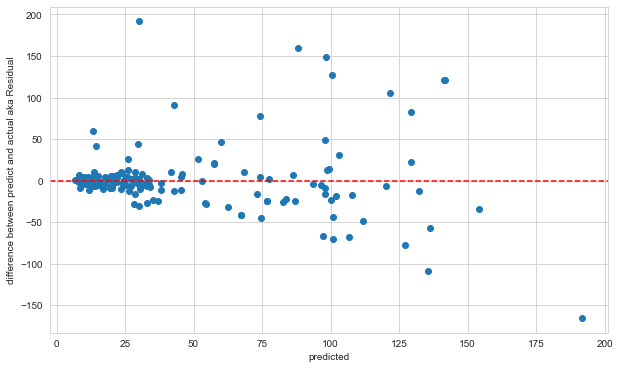

In [747]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals)

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

Text(0, 0.5, 'predicted fare')

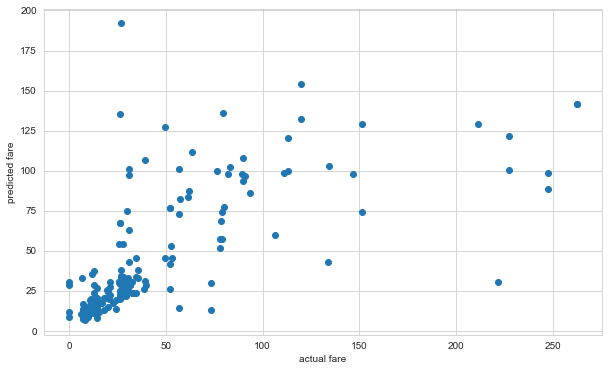

In [748]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict)

plt.xlabel('actual fare')

plt.ylabel('predicted fare')

In [749]:
#### We will call it the day here because now its not improving and the best model to predict the fare is I think with R2 0.54 but still we are off by 31 pounds which is too much in this scenario
#### if anybody know how to improve further please let me know, it seems like fare is harder to predict and no wonder this data set is usually used to predict Survivors not the fare but I wanted to challenge myself